### Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Análise quanto às idades**:

In [ ]:
df_idade = pd.read_csv("/content/drive/MyDrive/PosFiap_covid/resultado_idade_entrevistados.csv")
df_idade_pos = pd.read_csv("/content/drive/MyDrive/PosFiap_covid/resultado_idade_positivo.csv")

In [ ]:
df_idade.shape

(1157984, 2)

In [ ]:
df_idade_pos.shape

(22485, 2)

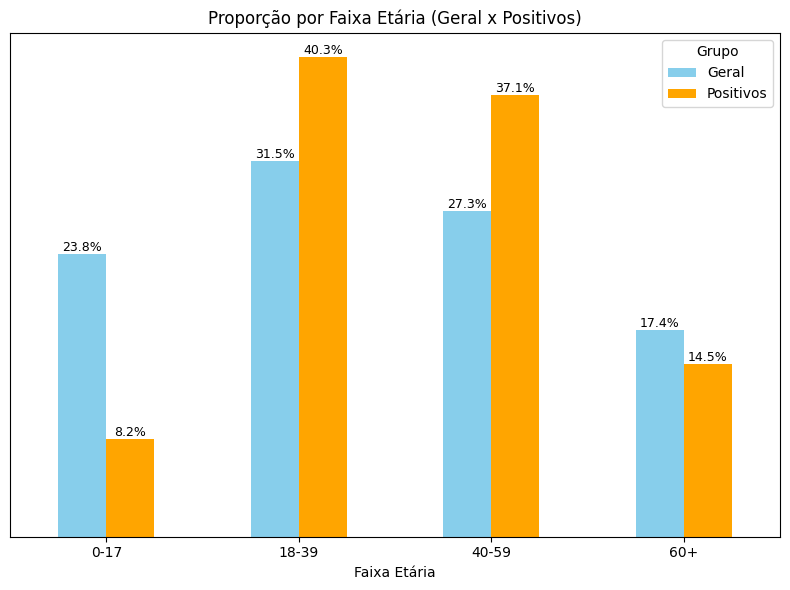

In [ ]:
bins = [-1, 17, 39, 59, 120]
labels = ["0-17", "18-39", "40-59", "60+"]

df_idade["faixa_etaria"] = pd.cut(df_idade["idade"], bins=bins, labels=labels)
df_idade_pos["faixa_etaria"] = pd.cut(df_idade_pos["idade"], bins=bins, labels=labels)
prop_idade = df_idade["faixa_etaria"].value_counts(normalize=True).reindex(labels).mul(100).round(2)
prop_idade_pos = df_idade_pos["faixa_etaria"].value_counts(normalize=True).reindex(labels).mul(100).round(2)

# Juntar num dataframe
proporcoes_idade = pd.DataFrame({"Geral": prop_idade, "Positivos": prop_idade_pos})

# Criar gráfico lado a lado
ax = proporcoes_idade.plot(kind="bar", figsize=(8,6), color=["skyblue", "orange"])

plt.title("Proporção por Faixa Etária (Geral x Positivos)")
ax.yaxis.set_visible(False)
plt.xlabel("Faixa Etária")
plt.xticks(rotation=0)
plt.legend(title="Grupo")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1f}%",
                (p.get_x() + p.get_width() / 2, height),
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


### **1. Pergunta: Qual foi o perfil etário dos entrevistados que deram positivo?**

O gráfico mostra que os entrevistados que mais apresentaram resultado positivo estão concentrados nas faixas etárias de 18 a 39 anos (40,3%) e 40 a 59 anos (37,1%), ambas acima de sua participação no grupo geral. Já crianças e adolescentes de 0 a 17 anos (8,2%) e idosos com 60 anos ou mais (14,5%) aparecem proporcionalmente menos entre os positivos. Esse padrão indica que a população adulta em idade ativa foi a mais impactada, possivelmente devido à maior exposição em atividades sociais e profissionais, enquanto os extremos etários apresentaram menor incidência proporcional.

### **Análise quanto a situação dos domicílios:**

In [ ]:
domicilio_pos = pd.read_csv("/content/drive/MyDrive/PosFiap_covid/domicilio_positivos.csv")

In [ ]:
domicilio_pos.head()

,mes,situacao_domicilio
0,8,1
1,8,1
2,8,1
3,8,1
4,8,1


In [ ]:
domicilio_pos.shape

(22485, 2)

### **2. Quantos casos positivos vieram de áreas urbanas e quantos de áreas rurais?**




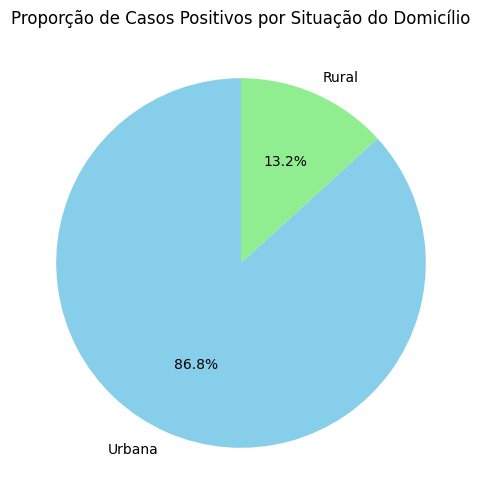

In [ ]:
mapa = {1: "Urbana", 2: "Rural"}
domicilio_pos["situacao_domicilio"] = domicilio_pos["situacao_domicilio"].map(mapa)
dist = domicilio_pos["situacao_domicilio"].value_counts(normalize=True).mul(100).round(2)
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(dist, labels=dist.index, autopct='%1.1f%%', startangle=90,
       colors=["skyblue", "lightgreen"])
ax.set_title("Proporção de Casos Positivos por Situação do Domicílio")

plt.show()


O gráfico revela que a maioria dos casos positivos de COVID-19 ocorreu em áreas urbanas (86,8%), enquanto apenas 13,2% foram registrados em áreas rurais. Esse resultado evidencia que a maior densidade populacional e o intenso contato social das cidades favorecem a disseminação do vírus, ao passo que a dispersão demográfica no meio rural contribui para uma incidência proporcionalmente menor. Ainda assim, a presença de casos no campo mostra que o vírus não ficou restrito aos centros urbanos, destacando a importância de estratégias de prevenção que contemplem também essas regiões.

### **Análise quanto ao sexos:**

In [ ]:
sexos_pos= pd.read_csv("/content/drive/MyDrive/PosFiap_covid/sexos_positivos.csv")

In [ ]:
sexos_pos.head()

,mes,Sexo
0,9,2
1,9,2
2,9,1
3,9,2
4,9,1


In [ ]:
sexos_pos.shape

(22485, 2)

### **3. Qual foi a distribuição dos casos positivos entre homens e mulheres?**

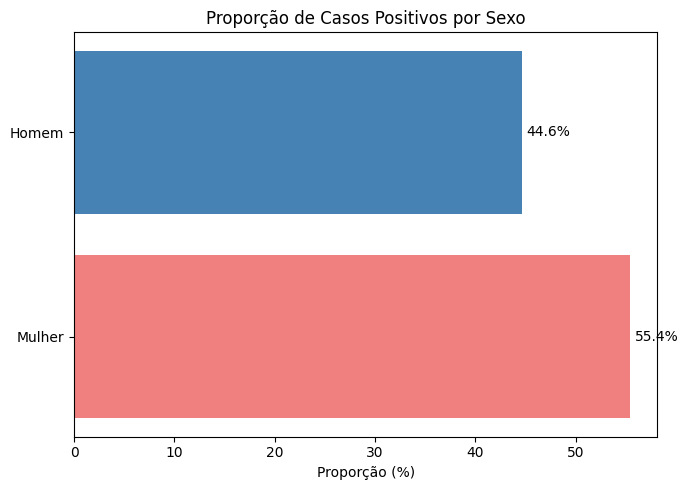

In [ ]:
mapa_sexo = {1: "Homem", 2: "Mulher"}
sexos_pos["Sexo"] = sexos_pos["Sexo"].map(mapa_sexo)
dist_sexo = sexos_pos["Sexo"].value_counts(normalize=True).mul(100).round(2)

fig, ax = plt.subplots(figsize=(7,5))
ax.barh(dist_sexo.index, dist_sexo.values, color=["lightcoral", "steelblue"])

for i, v in enumerate(dist_sexo.values):
    ax.text(v + 0.5, i, f"{v:.1f}%", va="center")

ax.set_title("Proporção de Casos Positivos por Sexo")
ax.set_xlabel("Proporção (%)")
ax.set_ylabel("")

plt.tight_layout()
plt.show()



A análise da proporção de casos positivos por sexo mostra que as mulheres representam 55,4% do total, enquanto os homens correspondem a 44,6%. Esse resultado sugere que, dentro da amostra analisada, as mulheres foram mais atingidas proporcionalmente. Tal diferença pode estar relacionada a fatores sociais e comportamentais, como maior exposição em atividades de cuidado, presença em determinados ambientes de trabalho ou até maior procura por serviços de saúde, o que aumenta a testagem e a detecção de casos. Esse achado pode orientar políticas públicas e campanhas de prevenção mais direcionadas a grupos específicos.

### **Análise quanto a cor ou raça:**

In [ ]:
cor_pos=pd.read_csv("/content/drive/MyDrive/PosFiap_covid/cor_positivos.csv")

In [ ]:
cor_pos.head()

,mes,cor
0,9,4
1,9,4
2,9,4
3,9,4
4,9,4


In [ ]:
cor_pos.shape

(22485, 2)

### **4.Qual foi a proporção de casos positivos por cor ou raça dos entrevistados?**

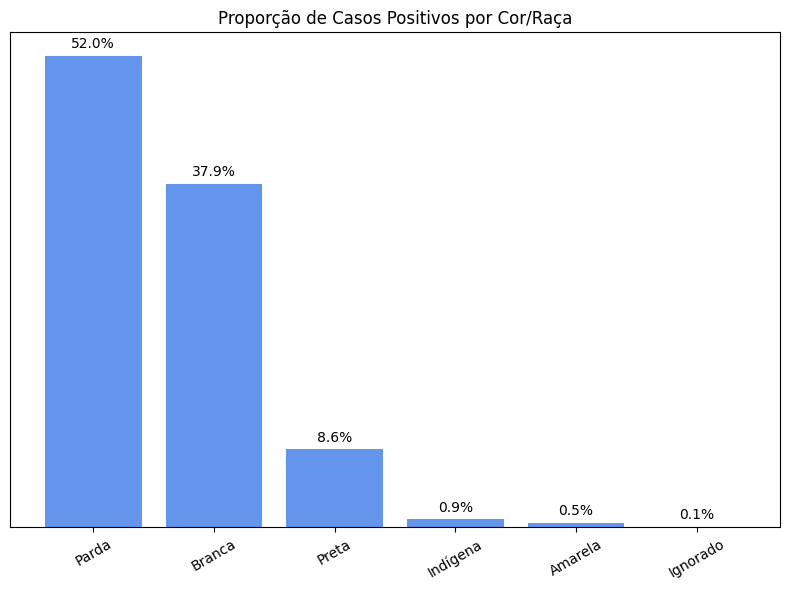

In [ ]:
mapa_cor = {
    1: "Branca",
    2: "Preta",
    3: "Amarela",
    4: "Parda",
    5: "Indígena",
    9: "Ignorado"
}

cor_pos["cor"] = cor_pos["cor"].map(mapa_cor)
dist_cor = cor_pos["cor"].value_counts(normalize=True).mul(100).round(2)

fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(dist_cor.index, dist_cor.values, color="cornflowerblue")

for bar, val in zip(bars, dist_cor.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f"{val:.1f}%", ha="center", va="bottom")


ax.set_title("Proporção de Casos Positivos por Cor/Raça")
ax.yaxis.set_visible(False)
ax.set_xlabel("")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


A predominância de positivos entre pardos e brancos reflete a composição demográfica da amostra e evidencia que esses grupos concentram a maior parte dos registros. Esse resultado pode ser interpretado como um reflexo da própria distribuição populacional brasileira, mas também pode indicar a importância de analisar fatores sociais e estruturais que influenciam a exposição e o acesso à saúde entre diferentes grupos raciais.

### **Análise quanto às Regiões**

In [ ]:
uf_pos= pd.read_csv("/content/drive/MyDrive/PosFiap_covid/uf_pos.csv")

In [ ]:
uf_pos.head()

,mes,UF
0,7,11
1,7,11
2,7,11
3,7,11
4,7,11


In [ ]:
uf_pos.shape

(22485, 2)

### **5. Qual foi a proporção de casos positivos por região do Brasil?**

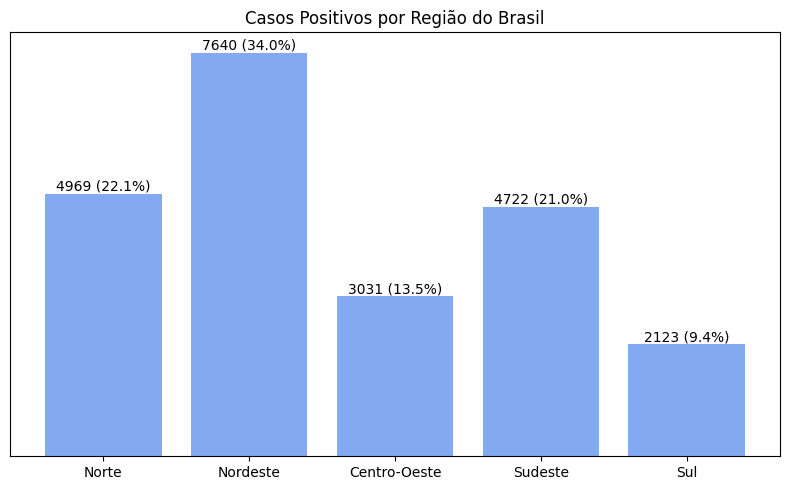

In [ ]:
uf_pos["UF"] = pd.to_numeric(uf_pos["UF"], errors="coerce").astype("Int64")

regioes_por_uf = {
    11: "Norte", 12: "Norte", 13: "Norte", 14: "Norte", 15: "Norte", 16: "Norte", 17: "Norte",
    21: "Nordeste", 22: "Nordeste", 23: "Nordeste", 24: "Nordeste", 25: "Nordeste",
    26: "Nordeste", 27: "Nordeste", 28: "Nordeste", 29: "Nordeste",
    31: "Sudeste", 32: "Sudeste", 33: "Sudeste", 35: "Sudeste",
    41: "Sul", 42: "Sul", 43: "Sul",
    50: "Centro-Oeste", 51: "Centro-Oeste", 52: "Centro-Oeste", 53: "Centro-Oeste",
}

uf_pos["Região"] = uf_pos["UF"].map(regioes_por_uf)
uf_pos = uf_pos.dropna(subset=["Região"])


contagem = uf_pos["Região"].value_counts().reindex(
    ["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"]
).fillna(0).astype(int)

total = contagem.sum()
percentuais = (contagem / total * 100).round(1)


fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(contagem.index, contagem.values, color="cornflowerblue", alpha=0.8)

for bar, n, pct in zip(bars, contagem.values, percentuais.values):
    ax.annotate(f"{n} ({pct}%)",
                (bar.get_x() + bar.get_width()/2, bar.get_height()),
                ha="center", va="bottom", fontsize=10)


ax.set_title("Casos Positivos por Região do Brasil")
ax.yaxis.set_visible(False)
ax.set_xlabel("")
plt.tight_layout()
plt.show()



O gráfico evidencia que a maior concentração de casos positivos ocorreu na região **Nordeste (34,0%)**, seguida pelo **Norte (22,1%)** e pelo **Sudeste (21,0%)**, que juntas somam mais de três quartos do total registrado. Em contrapartida, as regiões **Centro-Oeste (13,5%)** e **Sul (9,4%)** apresentaram proporções menores. Esse resultado sugere que a pandemia impactou de forma mais intensa as regiões com maior densidade populacional e desigualdades socioeconômicas mais marcantes, além de possíveis diferenças na oferta de serviços de saúde e no acesso à testagem, fatores que podem explicar parte da variação regional observada.


# Análise dos Sintomas e Internações

In [ ]:
! pip install pyspark

In [ ]:
!pip install findspark

In [ ]:
!pip install numpy

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Importando as bibliotecas

In [ ]:
# Import spark libraries
from pyspark.sql import Row, DataFrame, SparkSession
from pyspark.sql.types import StringType, StructType, StructField, IntegerType
from pyspark.sql.functions import col, expr, lit, substring, concat, concat_ws, when, coalesce, countDistinct
from pyspark.sql.functions import sum as spark_sum
from pyspark.sql import functions as F # for more sql functions
from functools import reduce

In [ ]:
#Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker

# 6. Top Sintomas recorrentes em pacientes com teste positivo para COVID

In [ ]:
# Base Sintomas
sintomas = spark.read.csv('/content/drive/MyDrive/PosFiap_covid/sintomas.csv', sep = ',',inferSchema=True, header = True)
sintomas.show(10)

+---+-------+-----+-----+-----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| UF|CAPITAL|V1013|V1022|V1023|A002|A003|A004|A005|A006|A007|A008|A009|B0011|B0012|B0013|B0014|B0015|B0016|B0017|B0018|B0019|B00110|B00111|B00112|B00113|B002|B0031|B0032|B0033|B0034|B0035|B0036|B0037|B0041|B0042|B0043|B0044|B0045|B0046|B005|B006|B007|B008|B009A|B009B|B009C|B009D|B009E|B009F|B0101|B0102|B0103|B0104|B0105|B0106|
+---+-------+-----+-----+-----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 11|     11|

In [ ]:
positivos = sintomas.where("B009B = 1 OR B009D = 1 OR B009F = 1")

positivos.show(10)

+---+-------+-----+-----+-----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| UF|CAPITAL|V1013|V1022|V1023|A002|A003|A004|A005|A006|A007|A008|A009|B0011|B0012|B0013|B0014|B0015|B0016|B0017|B0018|B0019|B00110|B00111|B00112|B00113|B002|B0031|B0032|B0033|B0034|B0035|B0036|B0037|B0041|B0042|B0043|B0044|B0045|B0046|B005|B006|B007|B008|B009A|B009B|B009C|B009D|B009E|B009F|B0101|B0102|B0103|B0104|B0105|B0106|
+---+-------+-----+-----+-----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 11|     11|

In [ ]:
# Criação de View para utilização no SparkSQL
positivos.createOrReplaceTempView('top_sintomas')

# Executar a query e armazenar em um DataFrame PySpark
top_sintomas = spark.sql(
    '''
SELECT 'B0011' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B0011 = 1
UNION ALL
SELECT 'B0012' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B0012 = 1
UNION ALL
SELECT 'B0013' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B0013 = 1
UNION ALL
SELECT 'B0014' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B0014 = 1
UNION ALL
SELECT 'B0015' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B0015 = 1
UNION ALL
SELECT 'B0016' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B0016 = 1
UNION ALL
SELECT 'B0017' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B0017 = 1
UNION ALL
SELECT 'B0018' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B0018 = 1
UNION ALL
SELECT 'B0019' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B0019 = 1
UNION ALL
SELECT 'B00110' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B00110 = 1
UNION ALL
SELECT 'B00111' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B00111 = 1
UNION ALL
SELECT 'B00112' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B00112 = 1
UNION ALL
SELECT 'B00113' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas WHERE B00113 = 1
ORDER BY quantidade DESC;
    '''
)

top_sintomas.show()

+------+----------+
|coluna|quantidade|
+------+----------+
| B0015|      2929|
| B0011|      2576|
| B0012|      2567|
|B00112|      2478|
|B00111|      2348|
| B0019|      2212|
| B0013|      2096|
| B0018|      1897|
| B0014|      1684|
|B00110|      1311|
| B0016|      1289|
| B0017|      1269|
|B00113|      1226|
+------+----------+



In [ ]:
perguntas = spark.read.csv('/content/drive/MyDrive/PosFiap_covid/perguntas.csv', sep=';', header=True, inferSchema=True)

In [ ]:
# Fazer o join entre top_sintomas e perguntas
df_sintomas = top_sintomas.join(
    perguntas,
    top_sintomas.coluna == perguntas.ID,
    'inner'  # Tipo de join - só traz registros que existem nos dois DataFrames
).select(
    top_sintomas.coluna,
    top_sintomas.quantidade,
    perguntas.Pergunta,
    perguntas.ID # Include perguntas.ID to resolve ambiguity if needed later
).orderBy(top_sintomas.quantidade.desc())

df_sintomas.show(truncate=False)

+------+----------+----------------------------------------------------+------+
|coluna|quantidade|Pergunta                                            |ID    |
+------+----------+----------------------------------------------------+------+
|B0015 |2929      |Na semana passada teve dor de cabeça?               |B0015 |
|B0011 |2576      |Na semana passada teve febre?                       |B0011 |
|B0012 |2567      |Na semana passada teve tosse?                       |B0012 |
|B00112|2478      |Na semana passada teve dor muscular?                |B00112|
|B00111|2348      |Na semana passada teve perda de cheiro ou sabor?    |B00111|
|B0019 |2212      |Na semana passada teve fadiga?                      |B0019 |
|B0013 |2096      |Na semana passada teve dor de garganta?             |B0013 |
|B0018 |1897      |Na semana passada teve nariz entupido ou escorrendo?|B0018 |
|B0014 |1684      |Na semana passada teve dificuldade para respirar?   |B0014 |
|B00110|1311      |Na semana passada tev

In [ ]:
df_sintomas = df_sintomas.withColumn(
    "sintoma",
    when(col("Pergunta").contains("dor de cabeça"), "Dor de cabeça")
    .when(col("Pergunta").contains("febre"), "Febre")
    .when(col("Pergunta").contains("tosse"), "Tosse")
    .when(col("Pergunta").contains("dor muscular"), "Dor muscular")
    .when(col("Pergunta").contains("perda de cheiro"), "Perda de olfato")
    .when(col("Pergunta").contains("fadiga"), "Fadiga")
    .when(col("Pergunta").contains("dor de garganta"), "Dor de garganta")
    .when(col("Pergunta").contains("nariz entupido"), "Congestão nasal")
    .when(col("Pergunta").contains("dificuldade para respirar"), "Dispneia")
    .when(col("Pergunta").contains("dor nos olhos"), "Dor nos olhos")
    .when(col("Pergunta").contains("dor no peito"), "Dor no peito")
    .when(col("Pergunta").contains("náusea"), "Náusea")
    .when(col("Pergunta").contains("diarreia"), "Diarreia")
    .otherwise("Outro sintoma")
)

df_sintomas.show(truncate=False)

+------+----------+----------------------------------------------------+------+---------------+
|coluna|quantidade|Pergunta                                            |ID    |sintoma        |
+------+----------+----------------------------------------------------+------+---------------+
|B0015 |2929      |Na semana passada teve dor de cabeça?               |B0015 |Dor de cabeça  |
|B0011 |2576      |Na semana passada teve febre?                       |B0011 |Febre          |
|B0012 |2567      |Na semana passada teve tosse?                       |B0012 |Tosse          |
|B00112|2478      |Na semana passada teve dor muscular?                |B00112|Dor muscular   |
|B00111|2348      |Na semana passada teve perda de cheiro ou sabor?    |B00111|Perda de olfato|
|B0019 |2212      |Na semana passada teve fadiga?                      |B0019 |Fadiga         |
|B0013 |2096      |Na semana passada teve dor de garganta?             |B0013 |Dor de garganta|
|B0018 |1897      |Na semana passada tev

In [ ]:
# Converter para pandas e ordenar por quantidade
df_top_sintomas = df_sintomas.select("sintoma", "quantidade").toPandas()
df_top_sintomas = df_top_sintomas.sort_values('quantidade', ascending=False)

# Criar gráfico
plt.figure(figsize=(12, 8))

# Gerar cores do viridis para cada barra
n_bars_sintomas = len(df_top_sintomas)
colors = cm.viridis(np.linspace(0, 1, n_bars_sintomas))

# Criar barras com as cores do viridis
bars = plt.bar(df_top_sintomas['sintoma'], df_top_sintomas['quantidade'], color=colors)
plt.title('Principais Sintomas em pacientes positivos', fontsize=16)
plt.xlabel('Sintomas', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 7. Top Sintomas mais recorrentes em pacientes que necessitaram de respiradores artificiais

In [ ]:
# Base Respiradores
respiradores = spark.read.csv('/content/drive/MyDrive/PosFiap_covid/respiradores.csv', sep = ',',inferSchema=True, header = True)
respiradores.show(10)

In [ ]:
# Criação de View para utilização no SparkSQL
respiradores.createOrReplaceTempView('top_sintomas_respiradores')

# Executar a query e armazenar em um DataFrame PySpark
top_sintomas_respiradores = spark.sql(
    '''
SELECT 'B0011' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B0011 = 1
UNION ALL
SELECT 'B0012' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B0012 = 1
UNION ALL
SELECT 'B0013' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B0013 = 1
UNION ALL
SELECT 'B0014' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B0014 = 1
UNION ALL
SELECT 'B0015' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B0015 = 1
UNION ALL
SELECT 'B0016' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B0016 = 1
UNION ALL
SELECT 'B0017' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B0017 = 1
UNION ALL
SELECT 'B0018' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B0018 = 1
UNION ALL
SELECT 'B0019' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B0019 = 1
UNION ALL
SELECT 'B00110' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B00110 = 1
UNION ALL
SELECT 'B00111' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B00111 = 1
UNION ALL
SELECT 'B00112' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B00112 = 1
UNION ALL
SELECT 'B00113' AS coluna, COUNT(*) AS quantidade
FROM top_sintomas_respiradores WHERE B00113 = 1
ORDER BY quantidade DESC;
    '''
)

top_sintomas_respiradores.show()

+------+----------+
|coluna|quantidade|
+------+----------+
| B0014|       143|
| B0011|       124|
| B0012|       118|
| B0019|       109|
|B00112|       104|
| B0015|        95|
| B0016|        83|
|B00111|        82|
| B0013|        70|
| B0018|        60|
| B0017|        54|
|B00113|        51|
|B00110|        49|
+------+----------+



In [ ]:
# Fazer o join entre top_sintomas_respiradores e perguntas
df_sintomas_respiradores = top_sintomas_respiradores.join(
    perguntas,
    top_sintomas_respiradores.coluna == perguntas.ID,
    'inner'  # Tipo de join - só traz registros que existem nos dois DataFrames
).select(
    top_sintomas_respiradores.coluna,
    top_sintomas_respiradores.quantidade,
    perguntas.Pergunta,
    perguntas.ID # Include perguntas.ID to resolve ambiguity if needed later
).orderBy(top_sintomas_respiradores.quantidade.desc())

df_sintomas_respiradores.show(truncate=False)

+------+----------+----------------------------------------------------+------+
|coluna|quantidade|Pergunta                                            |ID    |
+------+----------+----------------------------------------------------+------+
|B0014 |143       |Na semana passada teve dificuldade para respirar?   |B0014 |
|B0011 |124       |Na semana passada teve febre?                       |B0011 |
|B0012 |118       |Na semana passada teve tosse?                       |B0012 |
|B0019 |109       |Na semana passada teve fadiga?                      |B0019 |
|B00112|104       |Na semana passada teve dor muscular?                |B00112|
|B0015 |95        |Na semana passada teve dor de cabeça?               |B0015 |
|B0016 |83        |Na semana passada teve dor no peito?                |B0016 |
|B00111|82        |Na semana passada teve perda de cheiro ou sabor?    |B00111|
|B0013 |70        |Na semana passada teve dor de garganta?             |B0013 |
|B0018 |60        |Na semana passada tev

In [ ]:
df_sintomas_respiradores = df_sintomas_respiradores.withColumn(
    "sintoma",
    when(col("Pergunta").contains("dor de cabeça"), "Dor de cabeça")
    .when(col("Pergunta").contains("febre"), "Febre")
    .when(col("Pergunta").contains("tosse"), "Tosse")
    .when(col("Pergunta").contains("dor muscular"), "Dor muscular")
    .when(col("Pergunta").contains("perda de cheiro"), "Perda de olfato")
    .when(col("Pergunta").contains("fadiga"), "Fadiga")
    .when(col("Pergunta").contains("dor de garganta"), "Dor de garganta")
    .when(col("Pergunta").contains("nariz entupido"), "Congestão nasal")
    .when(col("Pergunta").contains("dificuldade para respirar"), "Dispneia")
    .when(col("Pergunta").contains("dor nos olhos"), "Dor nos olhos")
    .when(col("Pergunta").contains("dor no peito"), "Dor no peito")
    .when(col("Pergunta").contains("náusea"), "Náusea")
    .when(col("Pergunta").contains("diarreia"), "Diarreia")
    .otherwise("Outro sintoma")
)

df_sintomas_respiradores.show(truncate=False)

+------+----------+----------------------------------------------------+------+---------------+
|coluna|quantidade|Pergunta                                            |ID    |sintoma        |
+------+----------+----------------------------------------------------+------+---------------+
|B0014 |143       |Na semana passada teve dificuldade para respirar?   |B0014 |Dispneia       |
|B0011 |124       |Na semana passada teve febre?                       |B0011 |Febre          |
|B0012 |118       |Na semana passada teve tosse?                       |B0012 |Tosse          |
|B0019 |109       |Na semana passada teve fadiga?                      |B0019 |Fadiga         |
|B00112|104       |Na semana passada teve dor muscular?                |B00112|Dor muscular   |
|B0015 |95        |Na semana passada teve dor de cabeça?               |B0015 |Dor de cabeça  |
|B0016 |83        |Na semana passada teve dor no peito?                |B0016 |Dor no peito   |
|B00111|82        |Na semana passada tev

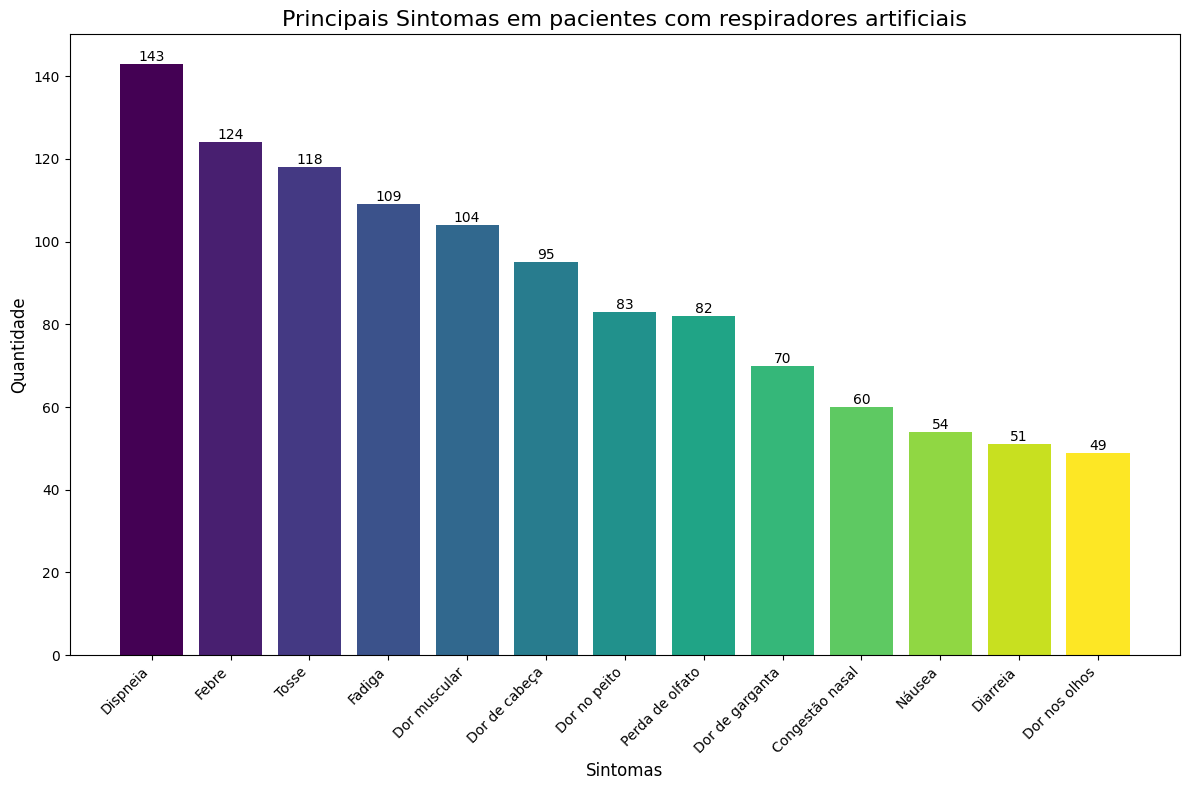

In [ ]:
# Converter para pandas e ordenar por quantidade
df_top_sintomas_respiradores = df_sintomas_respiradores.select("sintoma", "quantidade").toPandas()
df_top_sintomas_respiradores = df_top_sintomas_respiradores.sort_values('quantidade', ascending=False)

# Criar gráfico
plt.figure(figsize=(12, 8))

# Gerar cores do viridis para cada barra
n_bars = len(df_top_sintomas_respiradores)
colors = cm.viridis(np.linspace(0, 1, n_bars))

# Criar barras com as cores do viridis
bars = plt.bar(df_top_sintomas_respiradores['sintoma'], df_top_sintomas_respiradores['quantidade'], color=colors)
plt.title('Principais Sintomas em pacientes com respiradores artificiais', fontsize=16)
plt.xlabel('Sintomas', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# OBS: Sintomas de alerta

In [ ]:
# Separando os quartis para os dataframes de sintomas:

df_top_sintomas['quartil'] = pd.qcut(df_top_sintomas['quantidade'],
                                  q=4,
                                  labels=['Q1 (0-25%)', 'Q2 (25-50%)', 'Q3 (50-75%)', 'Q4 (75-100%)'],
                                  duplicates='drop')

df_top_sintomas_respiradores['quartil'] = pd.qcut(df_top_sintomas_respiradores['quantidade'],
                                  q=4,
                                  labels=['Q1 (0-25%)', 'Q2 (25-50%)', 'Q3 (50-75%)', 'Q4 (75-100%)'],
                                  duplicates='drop')

In [ ]:
df_top_sintomas

,sintoma,quantidade,quartil
0,Dor de cabeça,2929,Q4 (75-100%)
1,Febre,2576,Q4 (75-100%)
2,Tosse,2567,Q4 (75-100%)
3,Dor muscular,2478,Q3 (50-75%)
4,Perda de olfato,2348,Q3 (50-75%)
5,Fadiga,2212,Q3 (50-75%)
6,Dor de garganta,2096,Q2 (25-50%)
7,Congestão nasal,1897,Q2 (25-50%)
8,Dispneia,1684,Q2 (25-50%)
9,Dor nos olhos,1311,Q1 (0-25%)


In [ ]:
df_top_sintomas_respiradores

,sintoma,quantidade,quartil
0,Dispneia,143,Q4 (75-100%)
1,Febre,124,Q4 (75-100%)
2,Tosse,118,Q4 (75-100%)
3,Fadiga,109,Q3 (50-75%)
4,Dor muscular,104,Q3 (50-75%)
5,Dor de cabeça,95,Q3 (50-75%)
6,Dor no peito,83,Q2 (25-50%)
7,Perda de olfato,82,Q2 (25-50%)
8,Dor de garganta,70,Q2 (25-50%)
9,Congestão nasal,60,Q1 (0-25%)


##### É possível observar que os sintomas 'Febre' e 'Tosse' aparecem no quartis mais relevantes dos sintomas, desde casos mais simples, até os mais críticos como os de pacientes que necessitaram de respiradores artificiais.

##### Considerando a gravidade dos quadros de respiração, e da rapidez no atendimento, é imprescindível que pacientes que apresentem sintomas de 'Febre' e 'Tosse' sejam segregados como pacientes de maior risco, em casos de atendimentos hospitalares, pois podem vir a necessitar de respiradores artificiais durante o período de internação.

# 8. Quantos pacientes que testaram positivo necessitaram de respiradores artificiais?

In [ ]:
# Criação de View para utilização no SparkSQL
positivos.createOrReplaceTempView('percentual_respiradores')

# Executar a query e armazenar em um DataFrame PySpark
percentual_respiradores = spark.sql(
    '''
    SELECT
        'B006' AS coluna,
        B006 AS valor,
        CASE
            WHEN B006 = 1 THEN 'Sim'
            WHEN B006 = 2 THEN 'Não'
            WHEN B006 = 9 THEN 'Ignorado'
        END AS descricao,
        COUNT(*) AS quantidade
    FROM percentual_respiradores
    WHERE B006 IS NOT NULL AND B006 IN (1, 2, 9)
    GROUP BY B006
    ORDER BY quantidade DESC;
    '''
)

percentual_respiradores.show()

+------+-----+---------+----------+
|coluna|valor|descricao|quantidade|
+------+-----+---------+----------+
|  B006|    2|      Não|       215|
|  B006|    1|      Sim|       130|
|  B006|    9| Ignorado|         1|
+------+-----+---------+----------+



In [ ]:
# Converter o DataFrame PySpark para Pandas
df_respiradores = percentual_respiradores.toPandas()

print("DataFrame Pandas:")
print(df_respiradores)

DataFrame Pandas:
  coluna  valor descricao  quantidade
0   B006      2       Não         215
1   B006      1       Sim         130
2   B006      9  Ignorado           1


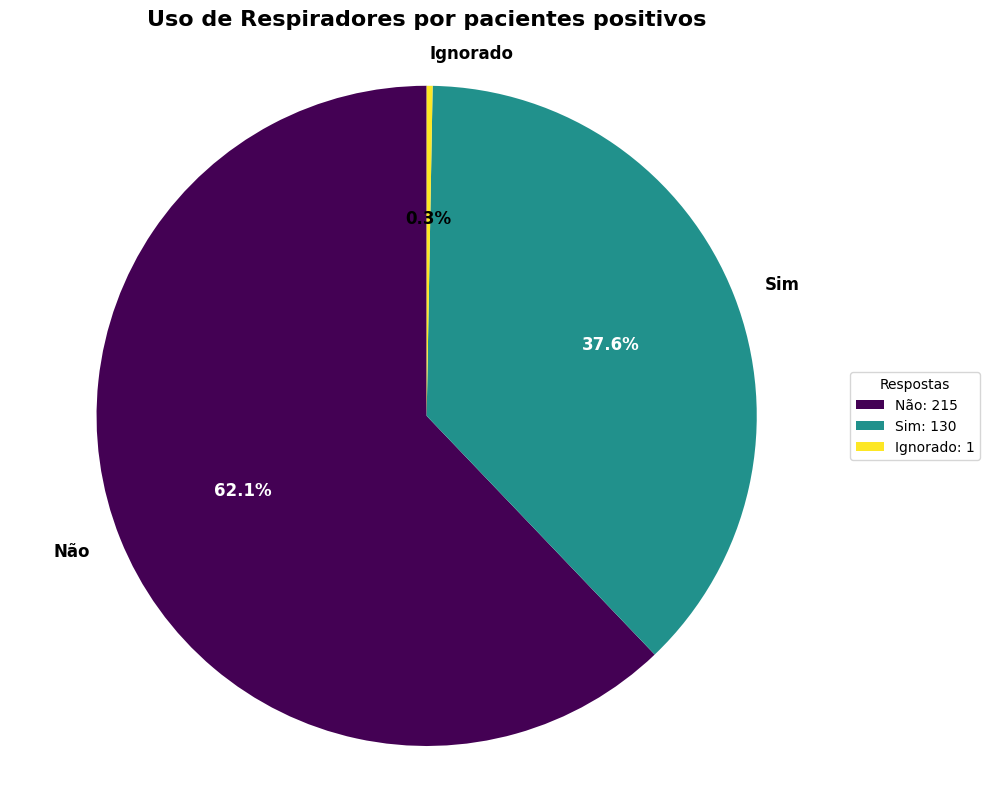

In [ ]:
# Criar gráfico de pizza
plt.figure(figsize=(10, 8))

# Obter o número de cores necessárias para o colormap viridis
n_colors = len(df_respiradores['quantidade'])

# Usar linspace para gerar valores entre 0 e 1
colors = cm.viridis(np.linspace(0, 1, n_colors))

# Criar o gráfico de pizza
wedges, texts, autotexts = plt.pie(df_respiradores['quantidade'],
                                     labels=df_respiradores['descricao'],
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})

# Função para calcular luminosidade e ajustar cor do texto
def luminance(color):
    """Calcula a luminosidade de uma cor RGB"""
    r, g, b = color[:3]
    return 0.299 * r + 0.587 * g + 0.114 * b

# Ajustar cor dos textos internos (percentuais) baseado na luminosidade
for i, (autotext, wedge) in enumerate(zip(autotexts, wedges)):
    color = wedge.get_facecolor()
    lum = luminance(color)
    # Se a cor for escura (luminosidade < 0.5), usar texto branco
    text_color = 'white' if lum < 0.5 else 'black'
    autotext.set_color(text_color)

plt.title('Uso de Respiradores por pacientes positivos',
          fontsize=16,
          fontweight='bold',
          pad=20)

# Adicionar legenda com as quantidades
legend_labels = [f"{desc}: {qtd}" for desc, qtd in
                 zip(df_respiradores['descricao'], df_respiradores['quantidade'])]
plt.legend(legend_labels,
          title="Respostas",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.axis('equal')  # Para garantir que o gráfico seja circular
plt.tight_layout()
plt.show()

##### Quase 40% dos pacientes que testaram positivo para COVID-19 precisaram ser internados e utilizar respiradores artificiais, o que representa o quadro mais grave da doença.

##### Considerando os riscos e impactos da doença, a testagem rápida e anamnese dos sintomas podem ser essenciais no tratamento rápido e eficaz destes pacientes.

# 9. Quantas pessoas com comorbidade testaram positivo para COVID?

In [ ]:
perguntas.show(truncate=False)

+-------------------+-------+----------+------------------------------------------------------+
|bloco              |ID     |grupamento|Pergunta                                              |
+-------------------+-------+----------+------------------------------------------------------+
|1                  |Ano    |0         |Ano de referência                                     |
|1                  |UF     |0         |Unidade da Federação                                  |
|1                  |CAPITAL|0         |Capital                                               |
|1                  |RM_RIDE|0         |Região Metropolitana e Região Administrativa Integrada|
|de Desenvolvimento"|NULL   |NULL      |NULL                                                  |
|1                  |V1008  |0         |Número de seleção do domicílio                        |
|1                  |V1012  |0         |Semana no mês                                         |
|1                  |V1013  |0         |

In [ ]:
# Identificando as perguntas de comorbidade pelo grupamento
perguntas.where(perguntas.grupamento == 'B10').show(truncate=False)

+-----+-----+----------+------------------------------------------------------------------------------------------------------------------+
|bloco|ID   |grupamento|Pergunta                                                                                                          |
+-----+-----+----------+------------------------------------------------------------------------------------------------------------------+
|B    |B0101|B10       |Algum médico já lhe deu o diagnóstico de diabetes?                                                                |
|B    |B0102|B10       |Algum médico já lhe deu o diagnóstico de hipertensão?                                                             |
|B    |B0103|B10       |Algum médico já lhe deu o diagnóstico de asma/bronquite/enfisema/doenças respiratória crônica ou doença de pulmão?|
|B    |B0104|B10       |Algum médico já lhe deu o diagnóstico de doenças do coração (infarto, angina, insuficiência cardíaca, arritmia)?  |
|B    |B0105|B10    

In [ ]:
# Usando PySpark para calcular o total de pacientes com comorbidades

# Código das perguntas que representam tipos de comorbidades, de acordo com o arquivo de perguntas.
colunas = ['B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106']

# Somar cada tipo de resposta através de todas as colunas
total_sim = sum([spark_sum(when(col(c) == 1, 1).otherwise(0)) for c in colunas])
total_nao = sum([spark_sum(when(col(c) == 2, 1).otherwise(0)) for c in colunas])
total_ignorado = sum([spark_sum(when(col(c) == 9, 1).otherwise(0)) for c in colunas])

comorbidades_positivos = positivos.agg(
    total_sim.alias('Sim'),
    total_nao.alias('Nao'),
    total_ignorado.alias('Ignorado')
).selectExpr(
    "stack(3, 'Sim', Sim, 'Não', Nao, 'Ignorado', Ignorado) as (tipo_resposta, quantidade)"
).orderBy('quantidade', ascending=False)

comorbidades_positivos.show()

+-------------+----------+
|tipo_resposta|quantidade|
+-------------+----------+
|          Não|    125370|
|          Sim|      9381|
|     Ignorado|       159|
+-------------+----------+



In [ ]:
# Converter para pandas
df_comorbidades_positivos = comorbidades_positivos.toPandas()

print("DataFrame de Comorbidades:")
print(df_comorbidades_positivos)

DataFrame de Comorbidades:
  tipo_resposta  quantidade
0           Não      125370
1           Sim        9381
2      Ignorado         159


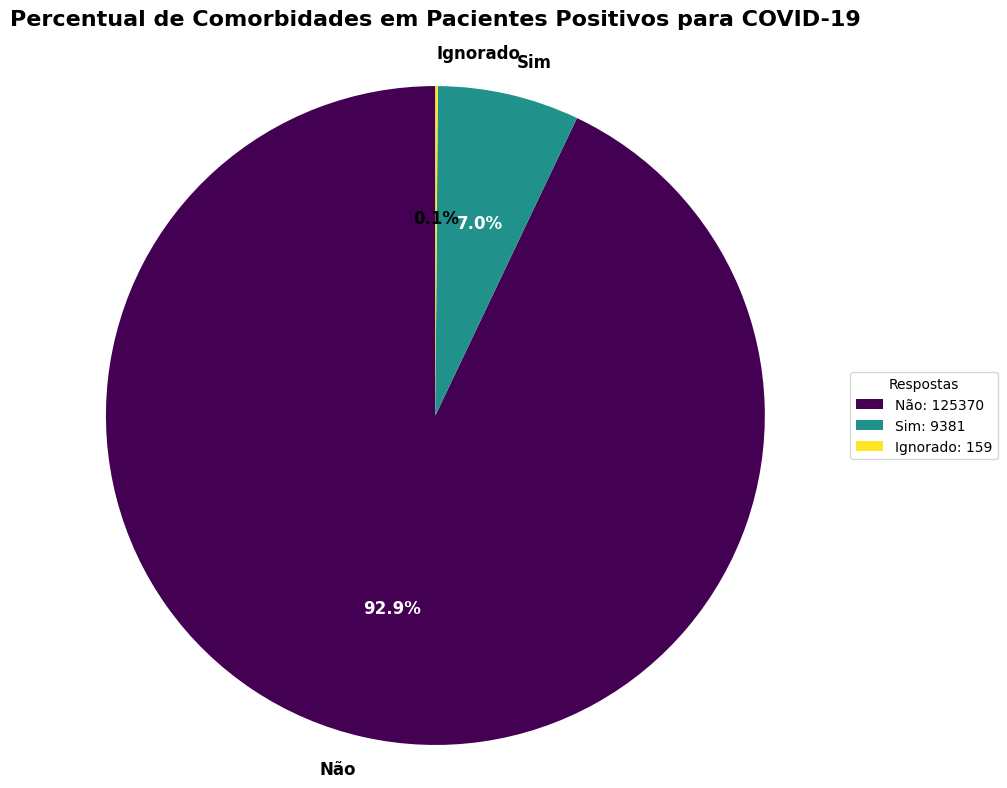

In [ ]:
# Criar gráfico de pizza
plt.figure(figsize=(10, 8))

# Obter o número de cores necessárias para o colormap viridis
n_colors = len(df_comorbidades_positivos['quantidade'])

# Usar linspace para gerar valores entre 0 e 1
colors = cm.viridis(np.linspace(0, 1, n_colors))

# Criar o gráfico de pizza
wedges, texts, autotexts = plt.pie(df_comorbidades_positivos['quantidade'],
                                     labels=df_comorbidades_positivos['tipo_resposta'],
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})

# Função para calcular luminosidade e ajustar cor do texto
def luminance(color):
    """Calcula a luminosidade de uma cor RGB"""
    r, g, b = color[:3]
    return 0.299 * r + 0.587 * g + 0.114 * b

# Ajustar cor dos textos internos (percentuais) baseado na luminosidade
for i, (autotext, wedge) in enumerate(zip(autotexts, wedges)):
    color = wedge.get_facecolor()
    lum = luminance(color)
    # Se a cor for escura (luminosidade < 0.5), usar texto branco
    text_color = 'white' if lum < 0.5 else 'black'
    autotext.set_color(text_color)

plt.title('Percentual de Comorbidades em Pacientes Positivos para COVID-19',
          fontsize=16,
          fontweight='bold',
          pad=20)

# Adicionar legenda com as quantidades
legend_labels = [f"{tipo}: {qtd}" for tipo, qtd in
                 zip(df_comorbidades_positivos['tipo_resposta'], df_comorbidades_positivos['quantidade'])]
plt.legend(legend_labels,
          title="Respostas",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.axis('equal')
plt.tight_layout()
plt.show()

# 10. Quantas pessoas com comorbidade precisaram de respiradores artificiais?

In [ ]:
# Usando PySpark para calcular o total de pacientes com comorbidades
# dentro do grupo que utilizou respiradores artificiais

# Código das perguntas que representam tipos de comorbidades, de acordo com o arquivo de perguntas.
colunas = ['B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106']

# Somar cada tipo de resposta através de todas as colunas
total_sim = sum([spark_sum(when(col(c) == 1, 1).otherwise(0)) for c in colunas])
total_nao = sum([spark_sum(when(col(c) == 2, 1).otherwise(0)) for c in colunas])
total_ignorado = sum([spark_sum(when(col(c) == 9, 1).otherwise(0)) for c in colunas])

comorbidades_respiradores = respiradores.agg(
    total_sim.alias('Sim'),
    total_nao.alias('Nao'),
    total_ignorado.alias('Ignorado')
).selectExpr(
    "stack(3, 'Sim', Sim, 'Não', Nao, 'Ignorado', Ignorado) as (tipo_resposta, quantidade)"
).orderBy('quantidade', ascending=False)

comorbidades_respiradores.show()

+-------------+----------+
|tipo_resposta|quantidade|
+-------------+----------+
|          Não|       832|
|          Sim|       218|
|     Ignorado|         6|
+-------------+----------+



In [ ]:
# Converter para pandas
df_comorbidades_respiradores = comorbidades_respiradores.toPandas()

print("DataFrame de Comorbidades com Respiradores:")
print(df_comorbidades_respiradores)

DataFrame de Comorbidades com Respiradores:
  tipo_resposta  quantidade
0           Não         832
1           Sim         218
2      Ignorado           6


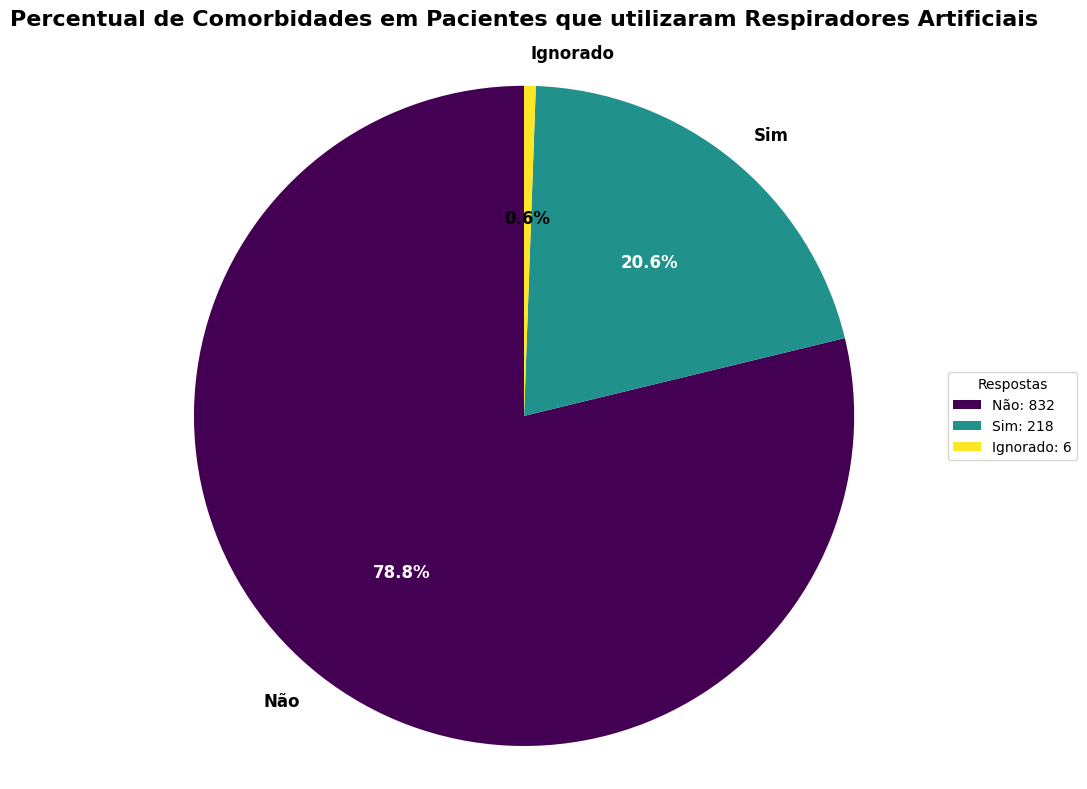

In [ ]:
# Criar gráfico de pizza
plt.figure(figsize=(10, 8))

# Obter o número de cores necessárias para o colormap viridis
n_colors = len(df_comorbidades_respiradores['quantidade'])

# Usar linspace para gerar valores entre 0 e 1
colors = cm.viridis(np.linspace(0, 1, n_colors))

# Criar o gráfico de pizza
wedges, texts, autotexts = plt.pie(df_comorbidades_respiradores['quantidade'],
                                     labels=df_comorbidades_respiradores['tipo_resposta'],
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})

# Função para calcular luminosidade e ajustar cor do texto
def luminance(color):
    """Calcula a luminosidade de uma cor RGB"""
    r, g, b = color[:3]
    return 0.299 * r + 0.587 * g + 0.114 * b

# Ajustar cor dos textos internos (percentuais) baseado na luminosidade
for i, (autotext, wedge) in enumerate(zip(autotexts, wedges)):
    color = wedge.get_facecolor()
    lum = luminance(color)
    # Se a cor for escura (luminosidade < 0.5), usar texto branco
    text_color = 'white' if lum < 0.5 else 'black'
    autotext.set_color(text_color)

plt.title('Percentual de Comorbidades em Pacientes que utilizaram Respiradores Artificiais',
          fontsize=16,
          fontweight='bold',
          pad=20)

# Adicionar legenda com as quantidades
legend_labels = [f"{tipo}: {qtd}" for tipo, qtd in
                 zip(df_comorbidades_respiradores['tipo_resposta'], df_comorbidades_respiradores['quantidade'])]
plt.legend(legend_labels,
          title="Respostas",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.axis('equal')
plt.tight_layout()
plt.show()

##### Apesar dos pacientes com comorbidade representarem apenas 7% do grupo que testou positivo, esses pacientes representam 20% dos casos mais graves da doença, isto é, 20% das internações correspondem a pacientes com alguma comorbidade.

# 11. Top Comorbidades mais frequentes em pacientes positivos para COVID.

In [ ]:
# Criação de View para utilização no SparkSQL
positivos.createOrReplaceTempView('lista_comorbidades_positivos')

# Executar a query e armazenar em um DataFrame PySpark
lista_comorbidades_positivos = spark.sql(
    '''
SELECT 'B0101' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_positivos WHERE B0101 = 1
UNION ALL
SELECT 'B0102' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_positivos WHERE B0102 = 1
UNION ALL
SELECT 'B0103' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_positivos WHERE B0103 = 1
UNION ALL
SELECT 'B0104' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_positivos WHERE B0104 = 1
UNION ALL
SELECT 'B0105' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_positivos WHERE B0105 = 1
UNION ALL
SELECT 'B0106' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_positivos WHERE B0106 = 1
ORDER BY quantidade DESC;
    '''
)

lista_comorbidades_positivos.show()

+------+----------+
|coluna|quantidade|
+------+----------+
| B0102|      4206|
| B0101|      1814|
| B0103|      1398|
| B0105|       900|
| B0104|       777|
| B0106|       286|
+------+----------+



In [ ]:
# Fazer o join entre lista_comorbidades_positivos e perguntas
df_lista_comorbidades = lista_comorbidades_positivos.join(
    perguntas,
    lista_comorbidades_positivos.coluna == perguntas.ID,
    'inner'  # Tipo de join - só traz registros que existem nos dois DataFrames
).select(
    lista_comorbidades_positivos.coluna,
    lista_comorbidades_positivos.quantidade,
    perguntas.Pergunta,
    perguntas.ID # Include perguntas.ID to resolve ambiguity if needed later
).orderBy(lista_comorbidades_positivos.quantidade.desc())

df_lista_comorbidades.show(truncate=False)

+------+----------+------------------------------------------------------------------------------------------------------------------+-----+
|coluna|quantidade|Pergunta                                                                                                          |ID   |
+------+----------+------------------------------------------------------------------------------------------------------------------+-----+
|B0102 |4206      |Algum médico já lhe deu o diagnóstico de hipertensão?                                                             |B0102|
|B0101 |1814      |Algum médico já lhe deu o diagnóstico de diabetes?                                                                |B0101|
|B0103 |1398      |Algum médico já lhe deu o diagnóstico de asma/bronquite/enfisema/doenças respiratória crônica ou doença de pulmão?|B0103|
|B0105 |900       |Algum médico já lhe deu o diagnóstico de depressão?                                                               |B0105|
|B0104 |777  

In [ ]:
df_lista_comorbidades = df_lista_comorbidades.withColumn(
    "comorbidade",
    when(col("Pergunta").contains("hipertensão"), "Hipertensão")
    .when(col("Pergunta").contains("diabetes"), "Diabetes")
    .when(col("Pergunta").contains("crônica"), "Doença Respiratória Crônica")
    .when(col("Pergunta").contains("depressão"), "Depressão")
    .when(col("Pergunta").contains("coração"), "Doenças do Coração")
    .when(col("Pergunta").contains("câncer"), "Câncer")
    .otherwise("Outro sintoma")
)

df_lista_comorbidades.show(truncate=False)

+------+----------+------------------------------------------------------------------------------------------------------------------+-----+---------------------------+
|coluna|quantidade|Pergunta                                                                                                          |ID   |comorbidade                |
+------+----------+------------------------------------------------------------------------------------------------------------------+-----+---------------------------+
|B0102 |4206      |Algum médico já lhe deu o diagnóstico de hipertensão?                                                             |B0102|Hipertensão                |
|B0101 |1814      |Algum médico já lhe deu o diagnóstico de diabetes?                                                                |B0101|Diabetes                   |
|B0103 |1398      |Algum médico já lhe deu o diagnóstico de asma/bronquite/enfisema/doenças respiratória crônica ou doença de pulmão?|B0103|Doença Respirat

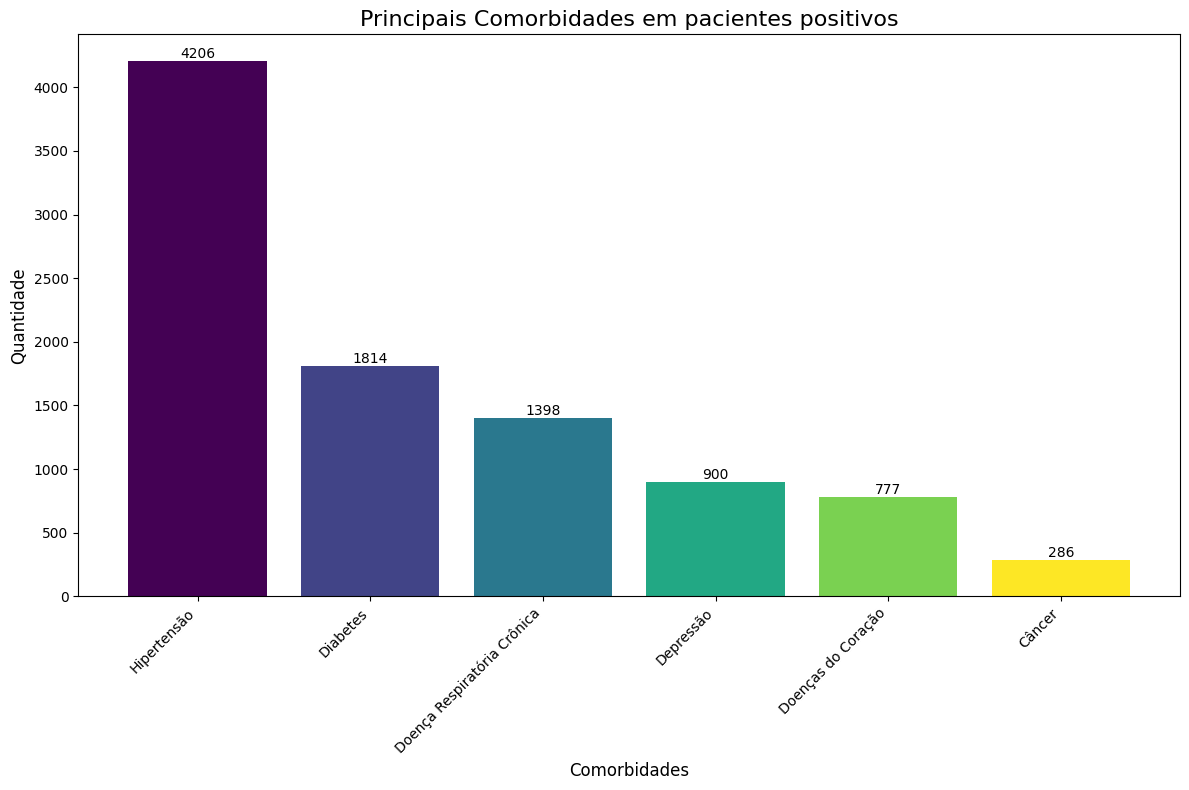

In [ ]:
# Converter para pandas e ordenar por quantidade
df_comorbidades = df_lista_comorbidades.select("comorbidade", "quantidade").toPandas()
df_comorbidades = df_comorbidades.sort_values('quantidade', ascending=False)

# Criar gráfico
plt.figure(figsize=(12, 8))

# Gerar cores do viridis para cada barra
n_bars = len(df_comorbidades)
colors = cm.viridis(np.linspace(0, 1, n_bars))

# Criar barras com as cores do viridis
bars = plt.bar(df_comorbidades['comorbidade'], df_comorbidades['quantidade'], color=colors)
plt.title('Principais Comorbidades em pacientes positivos', fontsize=16)
plt.xlabel('Comorbidades', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Criação de View para utilização no SparkSQL
respiradores.createOrReplaceTempView('lista_comorbidades_respiradores')

# Executar a query e armazenar em um DataFrame PySpark
lista_comorbidades_respiradores = spark.sql(
    '''
SELECT 'B0101' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_respiradores WHERE B0101 = 1
UNION ALL
SELECT 'B0102' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_respiradores WHERE B0102 = 1
UNION ALL
SELECT 'B0103' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_respiradores WHERE B0103 = 1
UNION ALL
SELECT 'B0104' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_respiradores WHERE B0104 = 1
UNION ALL
SELECT 'B0105' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_respiradores WHERE B0105 = 1
UNION ALL
SELECT 'B0106' AS coluna, COUNT(*) AS quantidade
FROM lista_comorbidades_respiradores WHERE B0106 = 1
ORDER BY quantidade DESC;
    '''
)

lista_comorbidades_respiradores.show()

+------+----------+
|coluna|quantidade|
+------+----------+
| B0102|        84|
| B0101|        54|
| B0104|        33|
| B0103|        31|
| B0105|        16|
| B0106|         0|
+------+----------+



In [ ]:
# Fazer o join entre lista_comorbidades_respiradores e perguntas
df_lista_comorbidades_respiradores = lista_comorbidades_respiradores.join(
    perguntas,
    lista_comorbidades_respiradores.coluna == perguntas.ID,
    'inner'  # Tipo de join - só traz registros que existem nos dois DataFrames
).select(
    lista_comorbidades_respiradores.coluna,
    lista_comorbidades_respiradores.quantidade,
    perguntas.Pergunta,
    perguntas.ID # Include perguntas.ID to resolve ambiguity if needed later
).orderBy(lista_comorbidades_respiradores.quantidade.desc())

df_lista_comorbidades_respiradores.show(truncate=False)

+------+----------+------------------------------------------------------------------------------------------------------------------+-----+
|coluna|quantidade|Pergunta                                                                                                          |ID   |
+------+----------+------------------------------------------------------------------------------------------------------------------+-----+
|B0102 |84        |Algum médico já lhe deu o diagnóstico de hipertensão?                                                             |B0102|
|B0101 |54        |Algum médico já lhe deu o diagnóstico de diabetes?                                                                |B0101|
|B0104 |33        |Algum médico já lhe deu o diagnóstico de doenças do coração (infarto, angina, insuficiência cardíaca, arritmia)?  |B0104|
|B0103 |31        |Algum médico já lhe deu o diagnóstico de asma/bronquite/enfisema/doenças respiratória crônica ou doença de pulmão?|B0103|
|B0105 |16   

In [ ]:
df_lista_comorbidades_respiradores = df_lista_comorbidades_respiradores.withColumn(
    "comorbidade",
    when(col("Pergunta").contains("hipertensão"), "Hipertensão")
    .when(col("Pergunta").contains("diabetes"), "Diabetes")
    .when(col("Pergunta").contains("crônica"), "Doença Respiratória Crônica")
    .when(col("Pergunta").contains("depressão"), "Depressão")
    .when(col("Pergunta").contains("coração"), "Doenças do Coração")
    .when(col("Pergunta").contains("câncer"), "Câncer")
    .otherwise("Outro sintoma")
)

df_lista_comorbidades_respiradores.show(truncate=False)

+------+----------+------------------------------------------------------------------------------------------------------------------+-----+---------------------------+
|coluna|quantidade|Pergunta                                                                                                          |ID   |comorbidade                |
+------+----------+------------------------------------------------------------------------------------------------------------------+-----+---------------------------+
|B0102 |84        |Algum médico já lhe deu o diagnóstico de hipertensão?                                                             |B0102|Hipertensão                |
|B0101 |54        |Algum médico já lhe deu o diagnóstico de diabetes?                                                                |B0101|Diabetes                   |
|B0104 |33        |Algum médico já lhe deu o diagnóstico de doenças do coração (infarto, angina, insuficiência cardíaca, arritmia)?  |B0104|Doenças do Cora

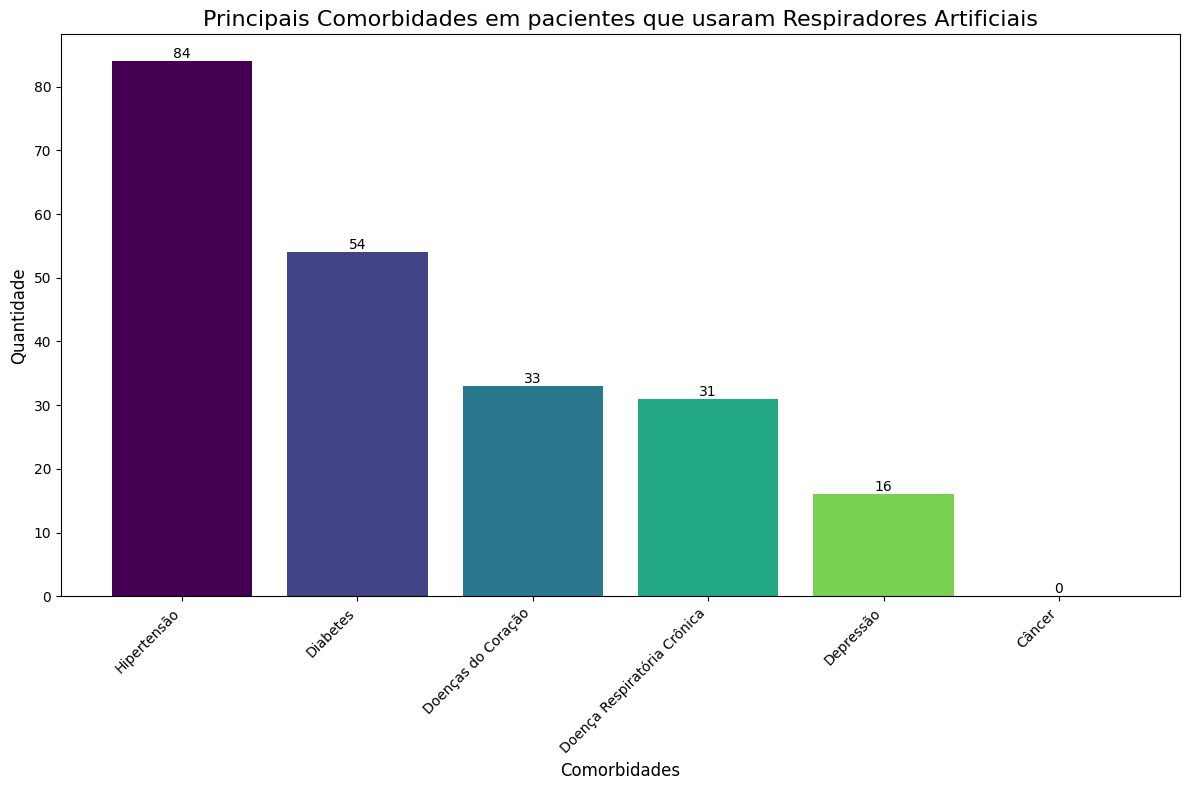

In [ ]:
# Converter para pandas e ordenar por quantidade
df_qtde_comorbidades_respiradores = df_lista_comorbidades_respiradores.select("comorbidade", "quantidade").toPandas()
df_qtde_comorbidades_respiradores = df_qtde_comorbidades_respiradores.sort_values('quantidade', ascending=False)

# Criar gráfico
plt.figure(figsize=(12, 8))

# Gerar cores do viridis para cada barra
n_bars = len(df_qtde_comorbidades_respiradores)
colors = cm.viridis(np.linspace(0, 1, n_bars))

# Criar barras com as cores do viridis
bars = plt.bar(df_qtde_comorbidades_respiradores['comorbidade'], df_qtde_comorbidades_respiradores['quantidade'], color=colors)
plt.title('Principais Comorbidades em pacientes que usaram Respiradores Artificiais', fontsize=16)
plt.xlabel('Comorbidades', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

### OBS: Comorbidades Críticas

In [ ]:
# Separando os quartis para os dataframes de sintomas:

df_comorbidades['quartil'] = pd.qcut(df_comorbidades['quantidade'],
                                  q=4,
                                  labels=['Q1 (0-25%)', 'Q2 (25-50%)', 'Q3 (50-75%)', 'Q4 (75-100%)'],
                                  duplicates='drop')

df_qtde_comorbidades_respiradores['quartil'] = pd.qcut(df_qtde_comorbidades_respiradores['quantidade'],
                                  q=4,
                                  labels=['Q1 (0-25%)', 'Q2 (25-50%)', 'Q3 (50-75%)', 'Q4 (75-100%)'],
                                  duplicates='drop')

In [ ]:
df_comorbidades

,comorbidade,quantidade,quartil
0,Hipertensão,4206,Q4 (75-100%)
1,Diabetes,1814,Q4 (75-100%)
2,Doença Respiratória Crônica,1398,Q3 (50-75%)
3,Depressão,900,Q2 (25-50%)
4,Doenças do Coração,777,Q1 (0-25%)
5,Câncer,286,Q1 (0-25%)


In [ ]:
df_qtde_comorbidades_respiradores

,comorbidade,quantidade,quartil
0,Hipertensão,84,Q4 (75-100%)
1,Diabetes,54,Q4 (75-100%)
2,Doenças do Coração,33,Q3 (50-75%)
3,Doença Respiratória Crônica,31,Q2 (25-50%)
4,Depressão,16,Q1 (0-25%)
5,Câncer,0,Q1 (0-25%)


##### Hipertensão e Diabetes são as comorbidades mais críticas para o mapeamento das unidades de saúde, pois representam **mais de 75%** de incidência sobre os pacientes com comorbidade que **testaram positivo** para a COVID-19, além de representar **mais de 75%** dos casos de pacientes com comorbidades que **necessitaram de respiradores artificiais**.

# 12. Quantas pessoas buscaram hospitais? Quantas foram internadas?

In [ ]:
# Usando PySpark para calcular o total de pacientes sintomáticos que testaram positivo e buscaram algum estabelecimento de saúde

# Somar cada tipo de resposta através de todas as colunas
total_sim = sum([spark_sum(when(col('B002') == 1, 1).otherwise(0))])
total_nao = sum([spark_sum(when(col('B002') == 2, 1).otherwise(0))])
total_ignorado = sum([spark_sum(when(col('B002') == 9, 1).otherwise(0))])

atendimento_saude = positivos.agg(
    total_sim.alias('Sim'),
    total_nao.alias('Nao'),
    total_ignorado.alias('Ignorado')
).selectExpr(
    "stack(3, 'Sim', Sim, 'Não', Nao, 'Ignorado', Ignorado) as (tipo_resposta, quantidade)"
).orderBy('quantidade', ascending=False)

atendimento_saude.show()

+-------------+----------+
|tipo_resposta|quantidade|
+-------------+----------+
|          Sim|      3401|
|          Não|      1396|
|     Ignorado|         9|
+-------------+----------+



In [ ]:
# Converter para pandas
df_atendimento = atendimento_saude.toPandas()

print("DataFrame de Atendimento:")
print(df_atendimento)

DataFrame de Atendimento:
  tipo_resposta  quantidade
0           Sim        3401
1           Não        1396
2      Ignorado           9


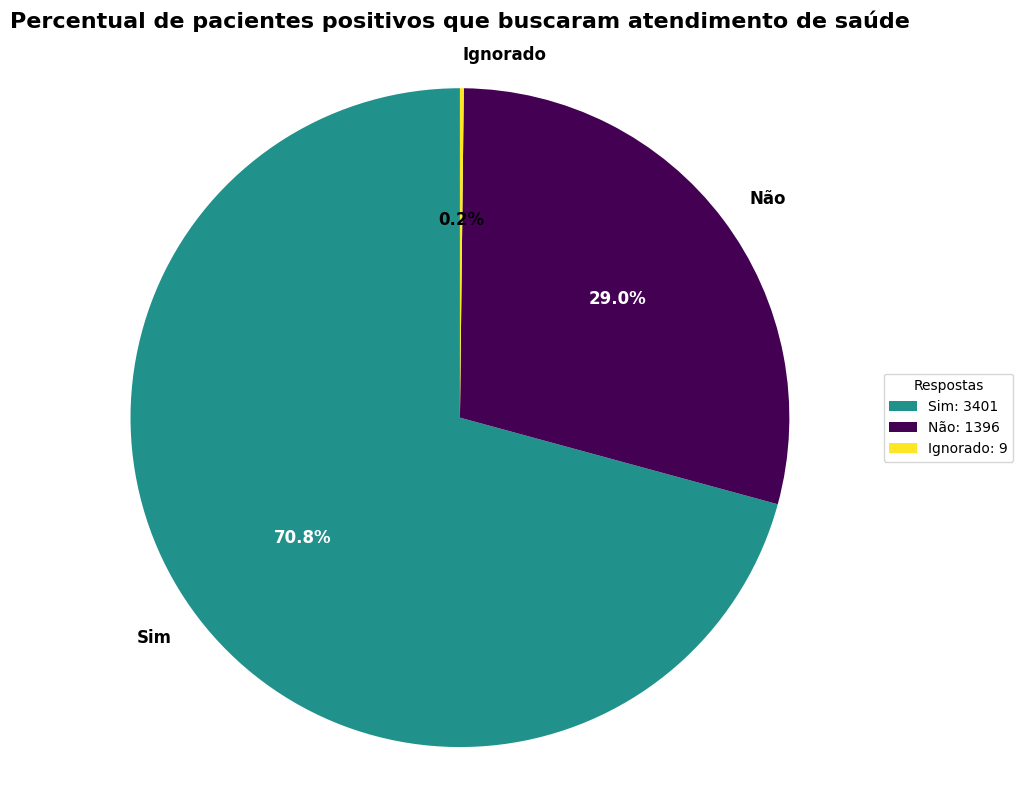

In [ ]:
# Criar gráfico de pizza
plt.figure(figsize=(10, 8))

# Usando as cores temas do colormap Viridis, e mantendo a coerência com os gráficos anteriores.
# Verde (#21918C) para 'Sim', Roxo (#440154) para 'Não', e Amarelo (#FDE725) para 'Ignorado'
colors = ['#21918C', '#440154', '#FDE725']

# Criar o gráfico de pizza
wedges, texts, autotexts = plt.pie(df_atendimento['quantidade'],
                                     labels=df_atendimento['tipo_resposta'],
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})

# Função para calcular luminosidade e ajustar cor do texto
def luminance(color):
    """Calcula a luminosidade de uma cor RGB"""
    r, g, b = color[:3]
    return 0.299 * r + 0.587 * g + 0.114 * b

# Ajustar cor dos textos internos (percentuais) baseado na luminosidade
for i, (autotext, wedge) in enumerate(zip(autotexts, wedges)):
    color = wedge.get_facecolor()
    lum = luminance(color)
    # Se a cor for escura (luminosidade < 0.5), usar texto branco
    text_color = 'white' if lum < 0.5 else 'black'
    autotext.set_color(text_color)

plt.title('Percentual de pacientes positivos que buscaram atendimento de saúde',
          fontsize=16,
          fontweight='bold',
          pad=20)

# Adicionar legenda com as quantidades
legend_labels = [f"{tipo}: {qtd}" for tipo, qtd in
                 zip(df_atendimento['tipo_resposta'], df_atendimento['quantidade'])]
plt.legend(legend_labels,
          title="Respostas",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Criação de View para utilização no SparkSQL
positivos.createOrReplaceTempView('lista_providencias')

# Executar a query e armazenar em um DataFrame PySpark
lista_providencias = spark.sql(
    '''
SELECT 'B0031' AS coluna, COUNT(*) AS quantidade
FROM lista_providencias WHERE B0031 = 1
UNION ALL
SELECT 'B0032' AS coluna, COUNT(*) AS quantidade
FROM lista_providencias WHERE B0032 = 1
UNION ALL
SELECT 'B0033' AS coluna, COUNT(*) AS quantidade
FROM lista_providencias WHERE B0033 = 1
UNION ALL
SELECT 'B0034' AS coluna, COUNT(*) AS quantidade
FROM lista_providencias WHERE B0034 = 1
UNION ALL
SELECT 'B0035' AS coluna, COUNT(*) AS quantidade
FROM lista_providencias WHERE B0035 = 1
UNION ALL
SELECT 'B0036' AS coluna, COUNT(*) AS quantidade
FROM lista_providencias WHERE B0036 = 1
UNION ALL
SELECT 'B0037' AS coluna, COUNT(*) AS quantidade
FROM lista_providencias WHERE B0037 = 1
ORDER BY quantidade DESC;
    '''
)

lista_providencias.show()

+------+----------+
|coluna|quantidade|
+------+----------+
| B0031|      1111|
| B0033|       535|
| B0034|       471|
| B0032|       199|
| B0035|       135|
| B0036|        39|
| B0037|        37|
+------+----------+



In [ ]:
# Fazer o join entre lista_providencias e perguntas
df_lista_providencias = lista_providencias.join(
    perguntas,
    lista_providencias.coluna == perguntas.ID,
    'inner'  # Tipo de join - só traz registros que existem nos dois DataFrames
).select(
    lista_providencias.coluna,
    lista_providencias.quantidade,
    perguntas.Pergunta,
    perguntas.ID # Include perguntas.ID to resolve ambiguity if needed later
).orderBy(lista_providencias.quantidade.desc())

df_lista_providencias.show(truncate=False)

+------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|coluna|quantidade|Pergunta                                                                                                                                                      |ID   |
+------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|B0031 |1111      |Providência tomada para recuperar dos sintomas foi ficar em casa                                                                                              |B0031|
|B0033 |535       |Providência tomada  para recuperar dos sintomas foi comprar e/ou tomar  remédio por conta própria                                                             |B0033|
|B0034 |471       |Providência tomada para recuperar dos sintomas foi compr

In [ ]:
df_lista_providencias = df_lista_providencias.withColumn(
    "providencia",
    when(col("Pergunta").contains("casa"), "Ficar em casa")
    .when(col("Pergunta").contains("própria"), "Automedicação")
    .when(col("Pergunta").contains("orientação"), "Medicação por Orientação Médica")
    .when(col("Pergunta").contains("ligar"), "Ligar para profissional da saúde")
    .when(col("Pergunta").contains("SUS"), "Visita do SUS")
    .when(col("Pergunta").contains("particular"), "Visita de profissional de saúde particular")
    .otherwise("Outra providência")
)

df_lista_providencias.show(truncate=False)

+------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+------------------------------------------+
|coluna|quantidade|Pergunta                                                                                                                                                      |ID   |providencia                               |
+------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+------------------------------------------+
|B0031 |1111      |Providência tomada para recuperar dos sintomas foi ficar em casa                                                                                              |B0031|Ficar em casa                             |
|B0033 |535       |Providência tomada  para recuperar dos sintomas foi comprar e/ou toma

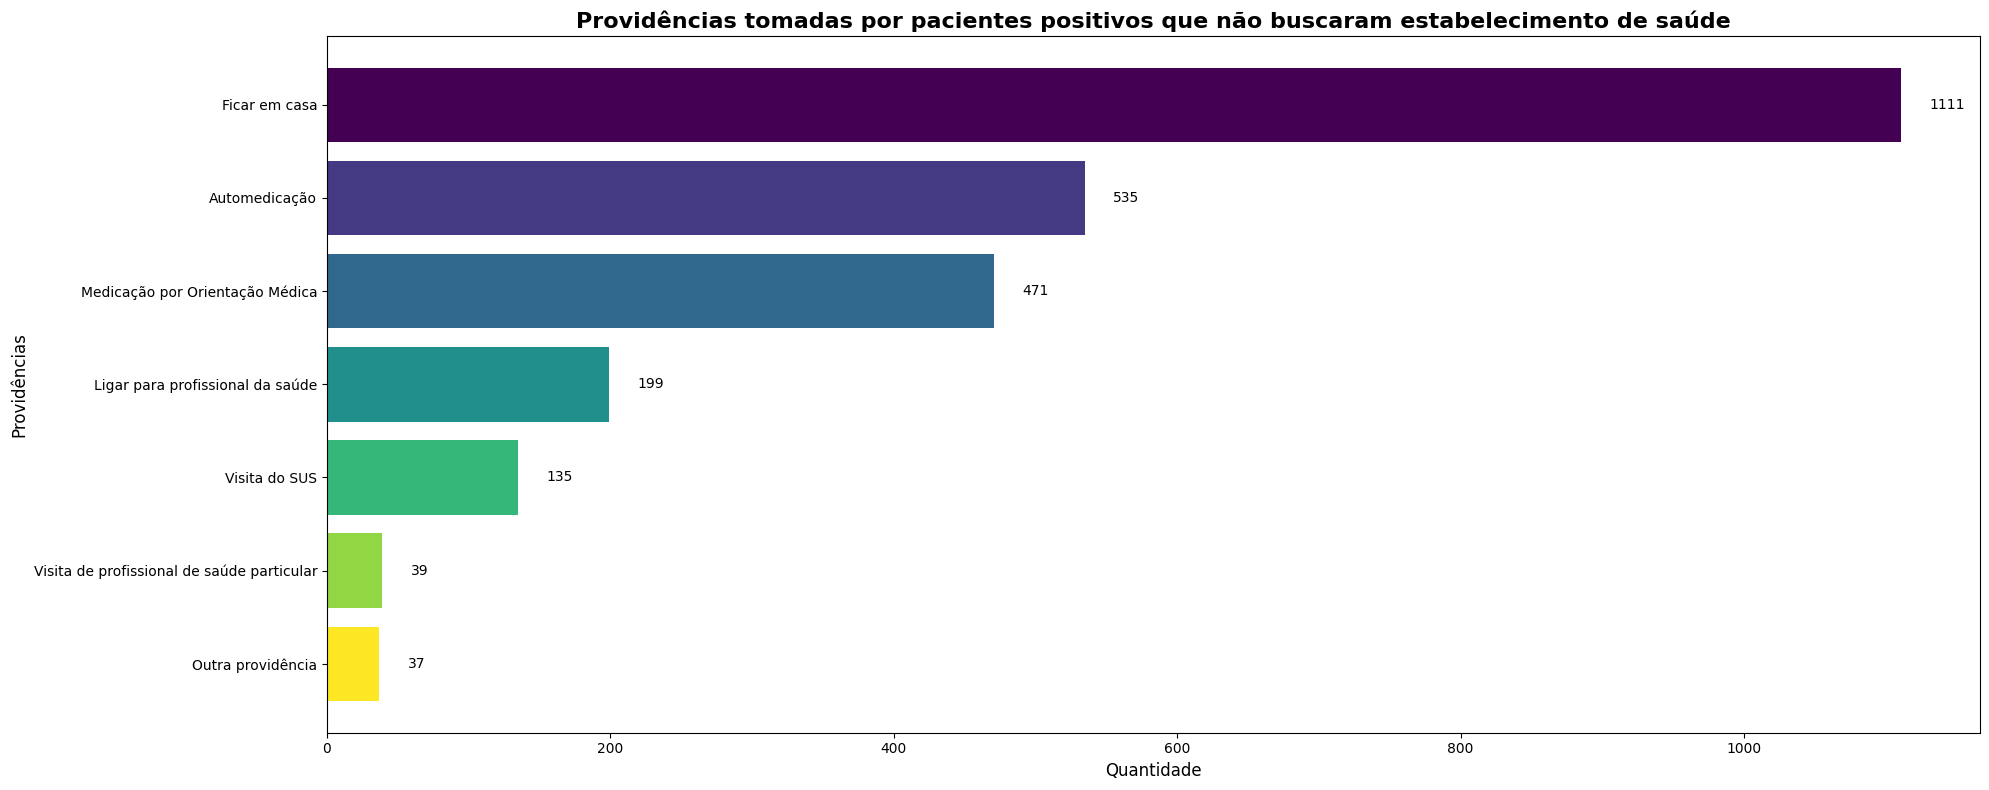

In [ ]:
# Converter para pandas e ordenar por quantidade
df_providencias = df_lista_providencias.select("providencia", "quantidade").toPandas()
df_providencias = df_providencias.sort_values('quantidade', ascending=True)

# Criar gráfico
plt.figure(figsize=(20, 8))

# Gerar cores do viridis para cada segmento
n_bars = len(df_providencias)
colors = cm.viridis_r(np.linspace(0, 1, n_bars))

# Criar barras HORIZONTAIS com as cores do viridis
bars = plt.barh(df_providencias['providencia'], df_providencias['quantidade'], color=colors)
plt.title('Providências tomadas por pacientes positivos que não buscaram estabelecimento de saúde', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Providências', fontsize=12)
plt.yticks(rotation=0)  # Labels das providências na horizontal

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}',
             ha='left', va='center')

plt.tight_layout()
plt.show()

In [ ]:
# Criação de View para utilização no SparkSQL
positivos.createOrReplaceTempView('lista_locais')

# Executar a query e armazenar em um DataFrame PySpark
lista_locais = spark.sql(
    '''
SELECT 'B0041' AS coluna, COUNT(*) AS quantidade
FROM lista_locais WHERE B0041 = 1
UNION ALL
SELECT 'B0042' AS coluna, COUNT(*) AS quantidade
FROM lista_locais WHERE B0042 = 1
UNION ALL
SELECT 'B0043' AS coluna, COUNT(*) AS quantidade
FROM lista_locais WHERE B0043 = 1
UNION ALL
SELECT 'B0044' AS coluna, COUNT(*) AS quantidade
FROM lista_locais WHERE B0044 = 1
UNION ALL
SELECT 'B0045' AS coluna, COUNT(*) AS quantidade
FROM lista_locais WHERE B0045 = 1
UNION ALL
SELECT 'B0046' AS coluna, COUNT(*) AS quantidade
FROM lista_locais WHERE B0046 = 1
ORDER BY quantidade DESC;
    '''
)

lista_locais.show()

+------+----------+
|coluna|quantidade|
+------+----------+
| B0041|      1633|
| B0043|       841|
| B0042|       752|
| B0046|       428|
| B0044|       244|
| B0045|       161|
+------+----------+



In [ ]:
# Fazer o join entre lista_locais e perguntas
df_lista_locais = lista_locais.join(
    perguntas,
    lista_locais.coluna == perguntas.ID,
    'inner'  # Tipo de join - só traz registros que existem nos dois DataFrames
).select(
    lista_locais.coluna,
    lista_locais.quantidade,
    perguntas.Pergunta,
    perguntas.ID # Include perguntas.ID to resolve ambiguity if needed later
).orderBy(lista_locais.quantidade.desc())

df_lista_locais.show(truncate=False)

+------+----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|coluna|quantidade|Pergunta                                                                                                                                                                      |ID   |
+------+----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|B0041 |1633      |Local que buscou atendimento foi posto de saúde/Unidade básica de saúde /Equipe de Saúde da Família (médico, enfermeiro, técnico de enfermagem ou agente comunitário de saúde)|B0041|
|B0043 |841       |Local que buscou atendimento foi hospital do SUS                                                                                                                              |B0

In [ ]:
df_lista_locais = df_lista_locais.withColumn(
    "locais",
    when(col("Pergunta").contains("posto"), "Posto de Saúde / UBS / Equipe de Saúde da Família")
    .when(col("Pergunta").contains("hospital do SUS"), "Hospital do SUS")
    .when(col("Pergunta").contains("pronto socorro do SUS"), "Pronto Socorro do SUS / UPA")
    .when(col("Pergunta").contains("hospital privado"), "Hospital Privado / Hospital Forças Armadas")
    .when(col("Pergunta").contains("consultório"), "Consultório Privado / Consultório Forças Armadas")
    .when(col("Pergunta").contains("pronto socorro privado"), "Pronto Socorro Privado / Pronto Socorro Forças Armadas")
    .otherwise("Outro")
)

df_lista_locais.show(truncate=False)

+------+----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+------------------------------------------------------+
|coluna|quantidade|Pergunta                                                                                                                                                                      |ID   |locais                                                |
+------+----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+------------------------------------------------------+
|B0041 |1633      |Local que buscou atendimento foi posto de saúde/Unidade básica de saúde /Equipe de Saúde da Família (médico, enfermeiro, técnico de enfermagem ou agente comunitário de saúde)|B0041|Posto de Saúde / UBS / Equipe de

In [ ]:
# Converter para pandas e ordenar por quantidade
df_locais = df_lista_locais.select("locais", "quantidade").toPandas()
df_locais = df_locais.sort_values('quantidade', ascending=True)

# Criar gráfico
plt.figure(figsize=(27, 8))

# Gerar cores do viridis para cada segmento
n_bars = len(df_locais)
colors = cm.viridis_r(np.linspace(0, 1, n_bars))

# Criar barras HORIZONTAIS com as cores do viridis
bars = plt.barh(df_locais['locais'], df_locais['quantidade'], color=colors)
plt.title('Locais buscados por pacientes positivos para atendimento de saúde', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade', fontsize=10)
plt.ylabel('Locais de atendimento', fontsize=10)
plt.yticks(rotation=0)

# Calcular total para os percentuais
total = df_locais['quantidade'].sum()

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    percentual = (width / total) * 100
    plt.text(width + 20, bar.get_y() + bar.get_height()/2.,
             f'{int(width)} ({percentual:.0f}%)',
             ha='left', va='center')

plt.tight_layout()
plt.show()

##### Cerca de 71% dos pacientes que testaram positivo para COVID-19 buscaram atendimento em algum estabelecimento de saúde. Dentre estes, 32% buscaram hospitais, e 40% buscaram um Posto de Saúde ou uma UBS.

##### Apesar da maior infraestrutura, os hospitais receberam menor procura por atendimento, comparado a postos de saúde. Esse fenômeno pode ser explicado pelo alto risco de contágio, o que faz com que pacientes com sintomas mais leves busquem locais com menor quantidade de casos graves da doença.

## Internações

In [ ]:
# Usando PySpark para calcular o total de internações em pacientes que testaram positivo e buscaram algum estabelecimento de saúde

# Somar cada tipo de resposta através de todas as colunas
total_sim = sum([spark_sum(when(col('B005') == 1, 1).otherwise(0))])
total_nao = sum([spark_sum(when(col('B005') == 2, 1).otherwise(0))])
total_nao_atendido = sum([spark_sum(when(col('B005') == 3, 1).otherwise(0))])
total_ignorado = sum([spark_sum(when(col('B005') == 9, 1).otherwise(0))])

internacoes = positivos.agg(
    total_sim.alias('Sim'),
    total_nao.alias('Nao'),
    total_nao_atendido.alias('Nao_atendido'),
    total_ignorado.alias('Ignorado')
).selectExpr(
    "stack(4, 'Sim', Sim, 'Não', Nao, 'Não Atendido', Nao_atendido, 'Ignorado', Ignorado) as (tipo_resposta, quantidade)"
).orderBy('quantidade', ascending=False)

internacoes.show()

+-------------+----------+
|tipo_resposta|quantidade|
+-------------+----------+
|          Não|      1598|
|          Sim|       346|
| Não Atendido|         6|
|     Ignorado|         1|
+-------------+----------+



In [ ]:
# Converter para pandas
df_internacoes = internacoes.toPandas()

print("DataFrame de Internações:")
print(df_internacoes)

DataFrame de Internações:
  tipo_resposta  quantidade
0           Não        1598
1           Sim         346
2  Não Atendido           6
3      Ignorado           1


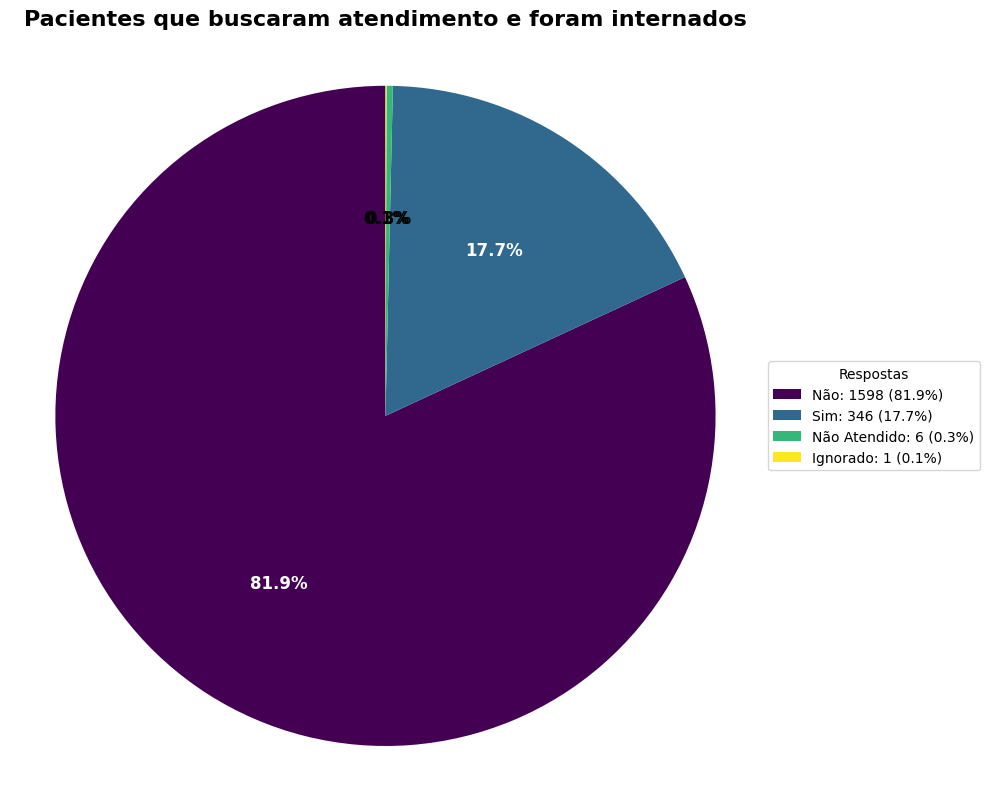

In [ ]:
# Criar gráfico de pizza
plt.figure(figsize=(10, 8))

# Obter o número de cores necessárias para o colormap viridis
n_colors = len(df_internacoes['quantidade'])

# Usar linspace para gerar valores entre 0 e 1
colors = cm.viridis(np.linspace(0, 1, n_colors))

# Calcular os percentuais
total = df_internacoes['quantidade'].sum()
percentuais = (df_internacoes['quantidade'] / total * 100)

# Criar o gráfico de pizza
wedges, texts, autotexts = plt.pie(df_internacoes['quantidade'],
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})

# Função para calcular luminosidade e ajustar cor do texto
def luminance(color):
    """Calcula a luminosidade de uma cor RGB"""
    r, g, b = color[:3]
    return 0.299 * r + 0.587 * g + 0.114 * b

# Ajustar cor dos textos internos (percentuais) baseado na luminosidade
for i, (autotext, wedge) in enumerate(zip(autotexts, wedges)):
    color = wedge.get_facecolor()
    lum = luminance(color)
    # Se a cor for escura (luminosidade < 0.5), usar texto branco
    text_color = 'white' if lum < 0.5 else 'black'
    autotext.set_color(text_color)

plt.title('Pacientes que buscaram atendimento e foram internados',
          fontsize=16,
          fontweight='bold',
          pad=20)

# Adicionar legenda com as quantidades E percentuais
legend_labels = [f"{tipo}: {qtd} ({pct:.1f}%)" for tipo, qtd, pct in
                 zip(df_internacoes['tipo_resposta'], df_internacoes['quantidade'], percentuais)]
plt.legend(legend_labels,
          title="Respostas",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.axis('equal')
plt.tight_layout()
plt.show()

##### Apenas 18% dos pacientes que buscaram atendimento foram, efetivamente, internados. Apesar do baixo percentual de internações por pacientes positivados, esse número pode significar um risco para hospitais que não estejam preparados para o súbito aumento da demanda por leitos e respiradores artificiais.

In [ ]:
dados = pd.read_csv ('/content/drive/MyDrive/PosFiap_covid/Planilha_COVID_3.csv')

In [ ]:
dados.head()

,mes,V1013,cor,d0051,d0031,d0041,d0053,f002a1,f002a2,f002a3,f002a4,f002a5,f0021,f0022
0,9,9,4,2,2,2,NaN,1,1,1,1,1,NaN,NaN
1,9,9,4,2,2,2,NaN,1,1,1,2,1,NaN,NaN
2,9,9,4,2,2,2,NaN,1,1,1,2,1,NaN,NaN
3,9,9,4,2,2,2,NaN,1,1,1,2,1,NaN,NaN
4,9,9,4,2,2,2,NaN,1,1,1,2,1,NaN,NaN


In [ ]:
dados.dropna()

,mes,V1013,cor,d0051,d0031,d0041,d0053,f002a1,f002a2,f002a3,f002a4,f002a5,f0021,f0022
23,9,9,4,1,2,2,600.0,1,1,1,2,1,400.0,2.0
25,9,9,4,1,2,1,600.0,1,2,1,2,1,2000.0,5.0
26,9,9,2,1,2,2,1200.0,1,1,1,2,1,400.0,2.0
64,9,9,4,1,2,2,600.0,1,1,1,2,1,380.0,2.0
79,9,9,2,1,1,2,1200.0,1,1,1,2,1,500.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22443,7,7,1,1,2,2,600.0,1,1,1,1,1,700.0,3.0
22453,7,7,1,1,2,2,600.0,1,1,1,2,1,500.0,2.0
22470,7,7,2,1,2,2,1200.0,1,1,1,1,1,850.0,4.0
22477,7,7,2,1,2,2,600.0,1,1,1,2,1,700.0,3.0


In [ ]:
columns_to_melt = ['d0051', 'd0031', 'd0041', 'd0053', 'f002a1', 'f002a2', 'f002a3', 'f002a4', 'f002a5', 'f0021', 'f0022']

dados_melted = dados.melt(id_vars=['mes', 'V1013', 'cor'],
                          value_vars=columns_to_melt,
                          var_name='Coluna Original',
                          value_name='Respostas')

display(dados_melted.head())

,mes,V1013,cor,Coluna Original,Respostas
0,9,9,4,d0051,2.0
1,9,9,4,d0051,2.0
2,9,9,4,d0051,2.0
3,9,9,4,d0051,2.0
4,9,9,4,d0051,2.0


In [ ]:
filtered_positives = dados_melted[dados_melted['Respostas'] == 1]

for mes in filtered_positives['mes'].unique():
  print(f"Mês: {mes}")
  for coluna_original in filtered_positives['Coluna Original'].unique():
    filtered_by_month_col = filtered_positives[(filtered_positives['mes'] == mes) & (filtered_positives['Coluna Original'] == coluna_original)]
    if not filtered_by_month_col.empty:
      print(f"  Coluna Original: {coluna_original}")
      display(filtered_by_month_col)

Mês: 9
  Coluna Original: d0051


,mes,V1013,cor,Coluna Original,Respostas
13,9,9,4,d0051,1.0
14,9,9,4,d0051,1.0
15,9,9,4,d0051,1.0
17,9,9,4,d0051,1.0
18,9,9,4,d0051,1.0
...,...,...,...,...,...
9514,9,9,4,d0051,1.0
9515,9,9,4,d0051,1.0
9516,9,9,4,d0051,1.0
9517,9,9,4,d0051,1.0


  Coluna Original: d0031


,mes,V1013,cor,Coluna Original,Respostas
22506,9,9,4,d0031,1.0
22519,9,9,4,d0031,1.0
22520,9,9,4,d0031,1.0
22521,9,9,4,d0031,1.0
22543,9,9,4,d0031,1.0
...,...,...,...,...,...
31960,9,9,4,d0031,1.0
31961,9,9,1,d0031,1.0
31962,9,9,1,d0031,1.0
31969,9,9,4,d0031,1.0


  Coluna Original: d0041


,mes,V1013,cor,Coluna Original,Respostas
44995,9,9,4,d0041,1.0
44999,9,9,4,d0041,1.0
45000,9,9,4,d0041,1.0
45001,9,9,2,d0041,1.0
45018,9,9,4,d0041,1.0
...,...,...,...,...,...
54204,9,9,1,d0041,1.0
54260,9,9,4,d0041,1.0
54364,9,9,2,d0041,1.0
54378,9,9,4,d0041,1.0


  Coluna Original: f002a1


,mes,V1013,cor,Coluna Original,Respostas
89940,9,9,4,f002a1,1.0
89941,9,9,4,f002a1,1.0
89942,9,9,4,f002a1,1.0
89943,9,9,4,f002a1,1.0
89944,9,9,4,f002a1,1.0
...,...,...,...,...,...
99454,9,9,4,f002a1,1.0
99455,9,9,4,f002a1,1.0
99456,9,9,4,f002a1,1.0
99457,9,9,4,f002a1,1.0


  Coluna Original: f002a2


,mes,V1013,cor,Coluna Original,Respostas
112425,9,9,4,f002a2,1.0
112426,9,9,4,f002a2,1.0
112427,9,9,4,f002a2,1.0
112428,9,9,4,f002a2,1.0
112429,9,9,4,f002a2,1.0
...,...,...,...,...,...
121939,9,9,4,f002a2,1.0
121940,9,9,4,f002a2,1.0
121941,9,9,4,f002a2,1.0
121942,9,9,4,f002a2,1.0


  Coluna Original: f002a3


,mes,V1013,cor,Coluna Original,Respostas
134910,9,9,4,f002a3,1.0
134911,9,9,4,f002a3,1.0
134912,9,9,4,f002a3,1.0
134913,9,9,4,f002a3,1.0
134914,9,9,4,f002a3,1.0
...,...,...,...,...,...
144424,9,9,4,f002a3,1.0
144425,9,9,4,f002a3,1.0
144426,9,9,4,f002a3,1.0
144427,9,9,4,f002a3,1.0


  Coluna Original: f002a4


,mes,V1013,cor,Coluna Original,Respostas
157395,9,9,4,f002a4,1.0
157405,9,9,1,f002a4,1.0
157406,9,9,2,f002a4,1.0
157416,9,9,4,f002a4,1.0
157417,9,9,4,f002a4,1.0
...,...,...,...,...,...
166906,9,9,1,f002a4,1.0
166907,9,9,1,f002a4,1.0
166908,9,9,4,f002a4,1.0
166909,9,9,4,f002a4,1.0


  Coluna Original: f002a5


,mes,V1013,cor,Coluna Original,Respostas
179880,9,9,4,f002a5,1.0
179881,9,9,4,f002a5,1.0
179882,9,9,4,f002a5,1.0
179883,9,9,4,f002a5,1.0
179884,9,9,4,f002a5,1.0
...,...,...,...,...,...
189394,9,9,4,f002a5,1.0
189395,9,9,4,f002a5,1.0
189396,9,9,4,f002a5,1.0
189397,9,9,4,f002a5,1.0


  Coluna Original: f0022


,mes,V1013,cor,Coluna Original,Respostas
224872,9,9,4,f0022,1.0
224959,9,9,4,f0022,1.0
224986,9,9,1,f0022,1.0
225011,9,9,4,f0022,1.0
225067,9,9,4,f0022,1.0
...,...,...,...,...,...
233999,9,9,4,f0022,1.0
234000,9,9,1,f0022,1.0
234045,9,9,1,f0022,1.0
234241,9,9,1,f0022,1.0


Mês: 8
  Coluna Original: d0051


,mes,V1013,cor,Coluna Original,Respostas
9532,8,8,4,d0051,1.0
9533,8,8,4,d0051,1.0
9535,8,8,4,d0051,1.0
9536,8,8,4,d0051,1.0
9538,8,8,4,d0051,1.0
...,...,...,...,...,...
17138,8,8,4,d0051,1.0
17141,8,8,4,d0051,1.0
17142,8,8,1,d0051,1.0
17149,8,8,1,d0051,1.0


  Coluna Original: d0031


,mes,V1013,cor,Coluna Original,Respostas
32030,8,8,4,d0031,1.0
32031,8,8,4,d0031,1.0
32032,8,8,4,d0031,1.0
32046,8,8,4,d0031,1.0
32058,8,8,4,d0031,1.0
...,...,...,...,...,...
39435,8,8,1,d0031,1.0
39454,8,8,4,d0031,1.0
39613,8,8,4,d0031,1.0
39619,8,8,4,d0031,1.0


  Coluna Original: d0041


,mes,V1013,cor,Coluna Original,Respostas
54513,8,8,4,d0041,1.0
54514,8,8,4,d0041,1.0
54590,8,8,1,d0041,1.0
54636,8,8,4,d0041,1.0
54637,8,8,4,d0041,1.0
...,...,...,...,...,...
62028,8,8,2,d0041,1.0
62039,8,8,4,d0041,1.0
62040,8,8,1,d0041,1.0
62065,8,8,4,d0041,1.0


  Coluna Original: f002a1


,mes,V1013,cor,Coluna Original,Respostas
99459,8,8,4,f002a1,1.0
99460,8,8,4,f002a1,1.0
99461,8,8,4,f002a1,1.0
99462,8,8,1,f002a1,1.0
99463,8,8,2,f002a1,1.0
...,...,...,...,...,...
107093,8,8,1,f002a1,1.0
107094,8,8,1,f002a1,1.0
107095,8,8,1,f002a1,1.0
107096,8,8,1,f002a1,1.0


  Coluna Original: f002a2


,mes,V1013,cor,Coluna Original,Respostas
121944,8,8,4,f002a2,1.0
121945,8,8,4,f002a2,1.0
121946,8,8,4,f002a2,1.0
121947,8,8,1,f002a2,1.0
121948,8,8,2,f002a2,1.0
...,...,...,...,...,...
129578,8,8,1,f002a2,1.0
129579,8,8,1,f002a2,1.0
129580,8,8,1,f002a2,1.0
129581,8,8,1,f002a2,1.0


  Coluna Original: f002a3


,mes,V1013,cor,Coluna Original,Respostas
144429,8,8,4,f002a3,1.0
144430,8,8,4,f002a3,1.0
144431,8,8,4,f002a3,1.0
144432,8,8,1,f002a3,1.0
144433,8,8,2,f002a3,1.0
...,...,...,...,...,...
152063,8,8,1,f002a3,1.0
152064,8,8,1,f002a3,1.0
152065,8,8,1,f002a3,1.0
152066,8,8,1,f002a3,1.0


  Coluna Original: f002a4


,mes,V1013,cor,Coluna Original,Respostas
166921,8,8,4,f002a4,1.0
166922,8,8,1,f002a4,1.0
166923,8,8,1,f002a4,1.0
166924,8,8,2,f002a4,1.0
166926,8,8,1,f002a4,1.0
...,...,...,...,...,...
174545,8,8,1,f002a4,1.0
174546,8,8,1,f002a4,1.0
174549,8,8,1,f002a4,1.0
174550,8,8,1,f002a4,1.0


  Coluna Original: f002a5


,mes,V1013,cor,Coluna Original,Respostas
189399,8,8,4,f002a5,1.0
189400,8,8,4,f002a5,1.0
189401,8,8,4,f002a5,1.0
189402,8,8,1,f002a5,1.0
189403,8,8,2,f002a5,1.0
...,...,...,...,...,...
197033,8,8,1,f002a5,1.0
197034,8,8,1,f002a5,1.0
197035,8,8,1,f002a5,1.0
197036,8,8,1,f002a5,1.0


  Coluna Original: f0022


,mes,V1013,cor,Coluna Original,Respostas
234387,8,8,4,f0022,1.0
234451,8,8,4,f0022,1.0
234458,8,8,4,f0022,1.0
234556,8,8,4,f0022,1.0
234637,8,8,4,f0022,1.0
...,...,...,...,...,...
241328,8,8,4,f0022,1.0
241384,8,8,2,f0022,1.0
241579,8,8,4,f0022,1.0
241744,8,8,1,f0022,1.0


Mês: 7
  Coluna Original: d0051


,mes,V1013,cor,Coluna Original,Respostas
17170,7,7,1,d0051,1.0
17171,7,7,1,d0051,1.0
17172,7,7,4,d0051,1.0
17173,7,7,4,d0051,1.0
17174,7,7,4,d0051,1.0
...,...,...,...,...,...
22470,7,7,2,d0051,1.0
22473,7,7,1,d0051,1.0
22477,7,7,2,d0051,1.0
22478,7,7,4,d0051,1.0


  Coluna Original: d0031


,mes,V1013,cor,Coluna Original,Respostas
39657,7,7,4,d0031,1.0
39658,7,7,4,d0031,1.0
39685,7,7,4,d0031,1.0
39755,7,7,4,d0031,1.0
39757,7,7,2,d0031,1.0
...,...,...,...,...,...
44717,7,7,2,d0031,1.0
44750,7,7,1,d0031,1.0
44752,7,7,4,d0031,1.0
44899,7,7,1,d0031,1.0


  Coluna Original: d0041


,mes,V1013,cor,Coluna Original,Respostas
62245,7,7,4,d0041,1.0
62253,7,7,4,d0041,1.0
62254,7,7,4,d0041,1.0
62255,7,7,4,d0041,1.0
62285,7,7,2,d0041,1.0
...,...,...,...,...,...
67419,7,7,4,d0041,1.0
67420,7,7,1,d0041,1.0
67421,7,7,4,d0041,1.0
67441,7,7,1,d0041,1.0


  Coluna Original: f002a1


,mes,V1013,cor,Coluna Original,Respostas
107098,7,7,4,f002a1,1.0
107099,7,7,4,f002a1,1.0
107100,7,7,4,f002a1,1.0
107101,7,7,4,f002a1,1.0
107102,7,7,1,f002a1,1.0
...,...,...,...,...,...
112420,7,7,1,f002a1,1.0
112421,7,7,4,f002a1,1.0
112422,7,7,1,f002a1,1.0
112423,7,7,1,f002a1,1.0


  Coluna Original: f002a2


,mes,V1013,cor,Coluna Original,Respostas
129583,7,7,4,f002a2,1.0
129584,7,7,4,f002a2,1.0
129585,7,7,4,f002a2,1.0
129586,7,7,4,f002a2,1.0
129587,7,7,1,f002a2,1.0
...,...,...,...,...,...
134905,7,7,1,f002a2,1.0
134906,7,7,4,f002a2,1.0
134907,7,7,1,f002a2,1.0
134908,7,7,1,f002a2,1.0


  Coluna Original: f002a3


,mes,V1013,cor,Coluna Original,Respostas
152068,7,7,4,f002a3,1.0
152069,7,7,4,f002a3,1.0
152070,7,7,4,f002a3,1.0
152071,7,7,4,f002a3,1.0
152072,7,7,1,f002a3,1.0
...,...,...,...,...,...
157390,7,7,1,f002a3,1.0
157391,7,7,4,f002a3,1.0
157392,7,7,1,f002a3,1.0
157393,7,7,1,f002a3,1.0


  Coluna Original: f002a4


,mes,V1013,cor,Coluna Original,Respostas
174554,7,7,4,f002a4,1.0
174555,7,7,4,f002a4,1.0
174556,7,7,4,f002a4,1.0
174559,7,7,1,f002a4,1.0
174560,7,7,4,f002a4,1.0
...,...,...,...,...,...
179875,7,7,1,f002a4,1.0
179876,7,7,4,f002a4,1.0
179877,7,7,1,f002a4,1.0
179878,7,7,1,f002a4,1.0


  Coluna Original: f002a5


,mes,V1013,cor,Coluna Original,Respostas
197038,7,7,4,f002a5,1.0
197039,7,7,4,f002a5,1.0
197040,7,7,4,f002a5,1.0
197041,7,7,4,f002a5,1.0
197042,7,7,1,f002a5,1.0
...,...,...,...,...,...
202360,7,7,1,f002a5,1.0
202361,7,7,4,f002a5,1.0
202362,7,7,1,f002a5,1.0
202363,7,7,1,f002a5,1.0


  Coluna Original: f0022


,mes,V1013,cor,Coluna Original,Respostas
242083,7,7,4,f0022,1.0
242121,7,7,5,f0022,1.0
242233,7,7,4,f0022,1.0
242293,7,7,1,f0022,1.0
242347,7,7,4,f0022,1.0
...,...,...,...,...,...
246778,7,7,4,f0022,1.0
246950,7,7,4,f0022,1.0
246953,7,7,4,f0022,1.0
246954,7,7,4,f0022,1.0


In [ ]:
relevant_months = [7, 8, 9]
relevant_columns = ['d0051', 'd0031', 'f002a1', 'f002a2', 'f002a3', 'f002a4', 'f002a5']

filtered_data = dados_melted[
    (dados_melted['mes'].isin(relevant_months)) &
    (dados_melted['Coluna Original'].isin(relevant_columns))
]

display(filtered_data.head())

,mes,V1013,cor,Coluna Original,Respostas
0,9,9,4,d0051,2.0
1,9,9,4,d0051,2.0
2,9,9,4,d0051,2.0
3,9,9,4,d0051,2.0
4,9,9,4,d0051,2.0


In [ ]:
auxilios_cols = ['d0051', 'd0031']
protecao_cols = ['f002a1', 'f002a2', 'f002a3', 'f002a4', 'f002a5']

filtered_data['Category'] = ''
filtered_data.loc[filtered_data['Coluna Original'].isin(auxilios_cols), 'Category'] = 'Auxílios'
filtered_data.loc[filtered_data['Coluna Original'].isin(protecao_cols), 'Category'] = 'Itens de Proteção'

display(filtered_data.head())

/tmp/ipython-input-3978085224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Category'] = ''


,mes,V1013,cor,Coluna Original,Respostas,Category
0,9,9,4,d0051,2.0,Auxílios
1,9,9,4,d0051,2.0,Auxílios
2,9,9,4,d0051,2.0,Auxílios
3,9,9,4,d0051,2.0,Auxílios
4,9,9,4,d0051,2.0,Auxílios


In [ ]:
response_counts = filtered_data.groupby(['mes', 'Category', 'Respostas']).size().unstack(fill_value=0)
display(response_counts)

Respostas                1.0    2.0  3.0
mes Category                            
7   Auxílios            2611   8043    0
    Itens de Proteção  23783   2807   45
8   Auxílios            3841  11437    0
    Itens de Proteção  33876   4294   25
9   Auxílios            4648  14390    0
    Itens de Proteção  42060   5489   46

In [ ]:
# Calculate the total counts for each month and category from response_counts
total_counts_per_group = response_counts.sum(axis=1)

# Calculate the percentage for each response type within each month and category
percentage_table = response_counts.div(total_counts_per_group, axis=0) * 100

display(percentage_table)

Respostas                    1.0        2.0       3.0
mes Category                                         
7   Auxílios           24.507227  75.492773  0.000000
    Itens de Proteção  89.292285  10.538765  0.168951
8   Auxílios           25.140725  74.859275  0.000000
    Itens de Proteção  88.692237  11.242309  0.065454
9   Auxílios           24.414329  75.585671  0.000000
    Itens de Proteção  88.370627  11.532724  0.096649

### **13.** *Familias que receberam auxílios emergenciais ou Bolsa Família tinham acesso a itens de proteção contra a COVID?*

---



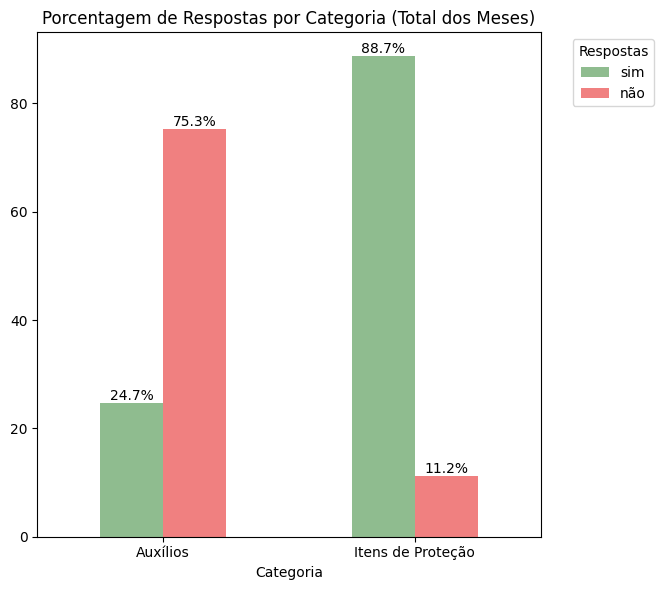

In [ ]:
# Calculate the total counts for each category across all months
total_counts_per_category = response_counts.groupby('Category').sum().sum(axis=1)

# Calculate the percentage for each response type within each category (aggregated across months)
percentage_table_aggregated = response_counts.groupby('Category').sum().div(total_counts_per_category, axis=0) * 100

# Use the percentage_table_aggregated for plotting
# Drop the '3.0' column as requested
percentage_table_filtered = percentage_table_aggregated.drop(columns=[3.0], errors='ignore')

ax = percentage_table_filtered.plot(kind='bar', figsize=(8, 6), color=['#8FBC8F', '#F08080'], width=0.5) # Example pastel green and red, adjusted width
plt.title('Porcentagem de Respostas por Categoria (Total dos Meses)')
plt.xlabel('Categoria')
plt.ylabel('') # Remove y-axis label
plt.xticks(rotation=0) # Rotate x-axis labels to 0 degrees


# Change legend labels (same as before)
handles, labels = ax.get_legend_handles_labels()
new_labels = ['sim' if label == '1.0' else 'não' if label == '2.0' else label for label in labels]
# Position the main legend outside the plot area
plt.legend(handles, new_labels, title='Respostas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%') # Format labels as percentages


plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend


plt.show()

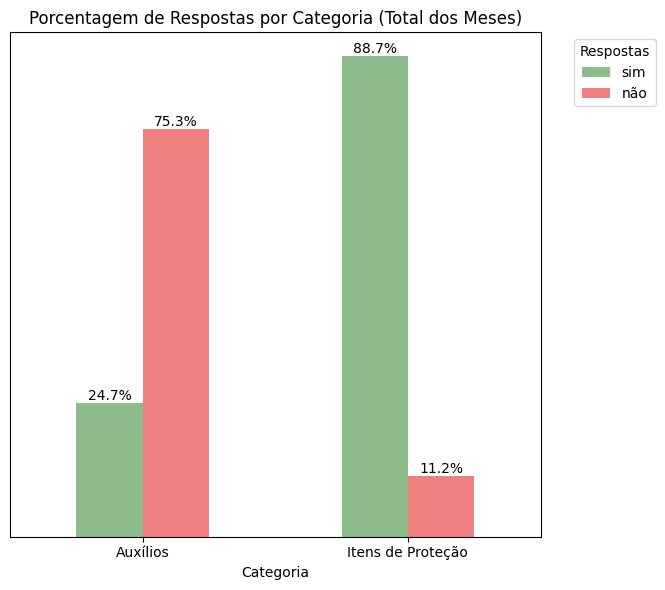

In [ ]:
# Calculate the total counts for each category across all months
total_counts_per_category = response_counts.groupby('Category').sum().sum(axis=1)

# Calculate the percentage for each response type within each category (aggregated across months)
percentage_table_aggregated = response_counts.groupby('Category').sum().div(total_counts_per_category, axis=0) * 100

# Use the percentage_table_aggregated for plotting
# Drop the '3.0' column as requested
percentage_table_filtered = percentage_table_aggregated.drop(columns=[3.0], errors='ignore')

ax = percentage_table_filtered.plot(kind='bar', figsize=(8, 6), color=['#8FBC8F', '#F08080'], width=0.5) # Example pastel green and red, adjusted width
plt.title('Porcentagem de Respostas por Categoria (Total dos Meses)')
plt.xlabel('Categoria')
plt.ylabel('') # Remove y-axis label
plt.xticks(rotation=0) # Rotate x-axis labels to 0 degrees
plt.yticks([]) # Remove y-axis tick labels


# Change legend labels (same as before)
handles, labels = ax.get_legend_handles_labels()
new_labels = ['sim' if label == '1.0' else 'não' if label == '2.0' else label for label in labels]
# Position the main legend outside the plot area
plt.legend(handles, new_labels, title='Respostas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%') # Format labels as percentages


plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend


plt.show()

Durante os meses de *julho, agosto e setembro* observou-se que a grande maioria das famílias beneficiadas por esses programas possuía acesso a itens de proteção contra a COVID-19, como máscaras, sabão e álcool em gel ***(aproximadamente 88,7%)***.

Esse resultado é coerente com os dados divulgados pela PNAD COVID-19, que apontaram que, embora a pandemia tenha acentuado desigualdades econômicas, o acesso a itens básicos de prevenção foi amplamente disseminado, em parte devido às campanhas públicas de distribuição e à popularização de máscaras reutilizáveis de baixo custo.

Em contraste, o percentual de famílias que declararam ter acesso a outros tipos de auxílio social — fora do escopo do Bolsa Família e do Auxílio Emergencial — foi consideravelmente menor ***(cerca de 24,7%)***, refletindo a limitação e a concentração das políticas emergenciais em programas principais.

A discrepância entre o acesso a auxílios financeiros e a itens de proteção reflete dois tipos distintos de política pública:

  **1.** Os auxílios emergenciais dependeram de critérios burocráticos e estrutura digital, o que limitou o alcance entre trabalhadores informais e famílias sem cadastro atualizado;

  **2.** Já o acesso a itens de proteção foi favorecido por ações descentralizadas e comunitárias, com ampla produção e distribuição gratuita ou de baixo custo.

### **14.** *Qual foi a participação dos rendimentos de programas sociais no total de renda domiciliar durante a pandemia?*

---



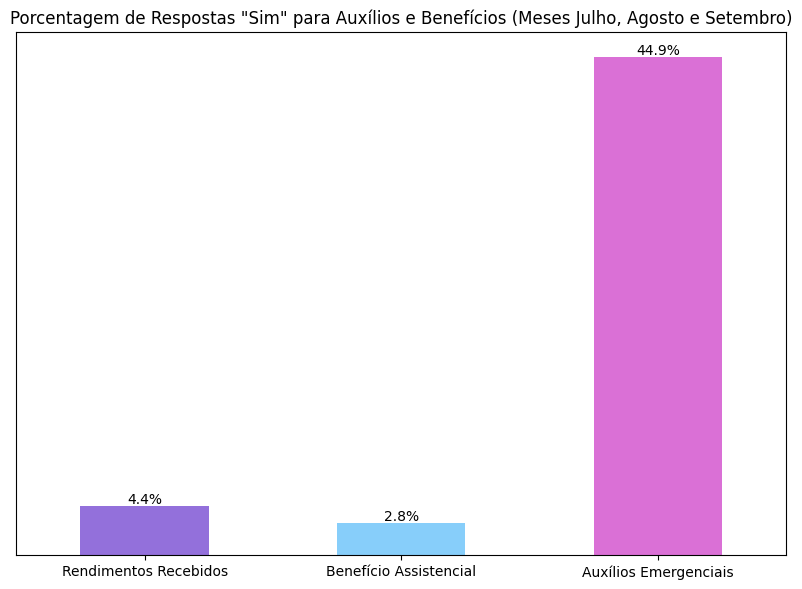

In [ ]:
# Filter the data for the relevant months and columns
relevant_months = [7, 8, 9]
relevant_columns_q2 = ['d0031', 'd0041', 'd0051']

filtered_data_q2 = dados_melted[
    (dados_melted['mes'].isin(relevant_months)) &
    (dados_melted['Coluna Original'].isin(relevant_columns_q2))
]

# Group by 'Coluna Original' and count the occurrences of response 1 (assuming 1 means 'sim')
response_counts_q2 = filtered_data_q2[filtered_data_q2['Respostas'] == 1].groupby('Coluna Original').size()

# Calculate the total counts for each column
total_counts_q2 = filtered_data_q2.groupby('Coluna Original').size()

# Calculate the percentage of response 1 for each column
percentage_q2 = (response_counts_q2 / total_counts_q2) * 100

# Define a mapping for the labels
label_mapping = {
    'd0031': 'Rendimentos Recebidos',
    'd0041': 'Benefício Assistencial',
    'd0051': 'Auxílios Emergenciais'
}

# Map the index of the percentage_q2 Series to the new labels
percentage_q2 = percentage_q2.rename(index=label_mapping)


# Create a bar plot of the percentages
ax = percentage_q2.plot(kind='bar', figsize=(8, 6), color=['#9370DB', '#87CEFA', '#DA70D6']) # Example pastel colors
plt.title('Porcentagem de Respostas "Sim" para Auxílios e Benefícios (Meses Julho, Agosto e Setembro)')
plt.xlabel('') # Remove x-axis label
plt.ylabel('') # Remove y-axis label
plt.xticks(rotation=0) # Rotate x-axis labels to 0 degrees
plt.yticks([]) # Remove y-axis tick labels


# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%') # Format labels as percentages


plt.tight_layout()
plt.show()

Os dados obtidos indicam que uma porcentagem significativamente maior de pessoas relatou ter recebido ***Auxílios Emergenciais*** relacionados ao coronavírus ***(44,9%)***. Esse resultado reflete o papel central que o programa desempenhou no contexto da pandemia, quando foi implementado com o objetivo de mitigar os impactos econômicos decorrentes da perda de renda e do isolamento social. De acordo com o Ministério da Cidadania (2020), o Auxílio Emergencial chegou a beneficiar mais de 68 milhões de brasileiros, o que explica seu amplo alcance nos dados analisados.

Em contraste, apenas *4,4%* dos entrevistados relataram ter ***recebido rendimentos*** de programas permanentes, como o Bolsa Família. Essa diferença pode ser atribuída ao caráter focalizado e contínuo do programa, que visa atender famílias em situação de pobreza e extrema pobreza, em vez de oferecer uma cobertura emergencial e massiva. O resultado, portanto, é coerente com o perfil historicamente restrito do Bolsa Família em comparação ao Auxílio Emergencial.

A menor porcentagem de respostas afirmativas ***(2,8%)*** foi observada no caso dos ***benefícios assistenciais***, como o Benefício de Prestação Continuada (BPC). Esse tipo de auxílio é direcionado a grupos específicos, como pessoas idosas ou com deficiência em situação de vulnerabilidade, e possui critérios de elegibilidade mais rigorosos, o que explica sua baixa incidência entre a população geral.

### **15.** *Qual a relação entre o recebimento do auxílio emergencial e a condição do domicílio?*

---



In [ ]:
#Inclusão da coluna f001 no CSV para análise
dados = pd.read_csv ('/content/drive/MyDrive/PosFiap_covid/Planilha_f001.csv')

In [ ]:
dados.head()

,mes,V1013,cor,d0051,d0031,d0041,d0053,f001,f002a1,f002a2,f002a3,f002a4,f002a5,f0021,f0022
0,9,9,4,2,2,2,NaN,1,1,1,1,1,1,NaN,NaN
1,9,9,4,2,2,2,NaN,1,1,1,1,2,1,NaN,NaN
2,9,9,4,2,2,2,NaN,1,1,1,1,2,1,NaN,NaN
3,9,9,4,2,2,2,NaN,1,1,1,1,2,1,NaN,NaN
4,9,9,4,2,2,2,NaN,1,1,1,1,2,1,NaN,NaN


In [ ]:
dados.dropna()

,mes,V1013,cor,d0051,d0031,d0041,d0053,f001,f002a1,f002a2,f002a3,f002a4,f002a5,f0021,f0022
23,9,9,4,1,2,2,600.0,3,1,1,1,2,1,400.0,2.0
25,9,9,4,1,2,1,600.0,3,1,2,1,2,1,2000.0,5.0
26,9,9,2,1,2,2,1200.0,3,1,1,1,2,1,400.0,2.0
64,9,9,4,1,2,2,600.0,3,1,1,1,2,1,380.0,2.0
79,9,9,2,1,1,2,1200.0,3,1,1,1,2,1,500.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22443,7,7,1,1,2,2,600.0,3,1,1,1,1,1,700.0,3.0
22453,7,7,1,1,2,2,600.0,3,1,1,1,2,1,500.0,2.0
22470,7,7,2,1,2,2,1200.0,3,1,1,1,1,1,850.0,4.0
22477,7,7,2,1,2,2,600.0,3,1,1,1,2,1,700.0,3.0


In [ ]:
# Filter the original DataFrame for relevant months and the 'f001' column
relevant_months = [7, 8, 9]
filtered_data_f001 = dados[dados['mes'].isin(relevant_months)]['f001']

# Count the occurrences of each response (1 to 7) in 'f001'
f001_counts = filtered_data_f001.value_counts().sort_index()

# Calculate the percentage of each response
f001_percentages = (f001_counts / f001_counts.sum()) * 100

# Define labels for the bar plot
labels = [
    'Próprio já pago',
    'Próprio ainda pagando',
    'Alugado',
    'Cedido por empregador',
    'Cedido por familiar',
    'Cedido de outra forma',
    'Outra condição'
]

# Create a bar plot of the percentages
plt.figure(figsize=(10, 6))
ax = f001_percentages.plot(kind='bar', color=['#FFC09F', '#BEEB9F', '#FFFFB5', '#FFD7B5', '#C6DBDA', '#DEB887', '#E0B0FF']) # Slightly stronger pastel colors
plt.title('Distribuição da Condição do Domicílio (Meses 7, 8 e 9)')
plt.xlabel('Condição do Domicílio')
plt.ylabel('') # Remove y-axis label
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right') # Set ticks and labels
plt.yticks([]) # Remove y-axis tick labels


# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')


plt.tight_layout()
plt.show()

Observa-se que o recebimento do Auxílio Emergencial está fortemente associado a *condições de moradia mais vulneráveis*, como domicílios *alugados* ou *cedidos*. Esse padrão reflete o público-alvo do programa, composto majoritariamente por famílias de baixa renda e trabalhadores informais que enfrentaram perda de renda durante a pandemia.

O gráfico mostra que, embora a maioria das famílias viva em imóvel próprio já quitado ***(66,5%)***, uma parcela expressiva — cerca de 24% — reside em condições mais precárias ***(aluguel, imóvel cedido ou em pagamento)***. É dentro desse grupo que se concentra a maior proporção de beneficiários do auxílio, já que o programa priorizou lares com maior comprometimento da renda com moradia ou dependência habitacional.

Assim, a análise sugere que o Auxílio Emergencial atuou como um suporte financeiro essencial para famílias com menor estabilidade habitacional, contribuindo para a manutenção do pagamento de aluguel, contas básicas e compra de alimentos durante os meses críticos da pandemia. Em contrapartida, famílias com imóvel próprio quitado — possivelmente em situação socioeconômica mais consolidada — apresentaram menor dependência do benefício.

# Grupo C - Características econômicas da sociedade

## PERGUNTA 16

In [ ]:
# ===============================
# Análise Consolidada
# ===============================
#df_total = pd.read_csv("/content/situacao_total.csv")

#Leitura arquivo
sheet_id = "1eKznhdgWOeeViyIumZSgpHPWcRDz4mxOcS9yRkRgYok"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

df_total = pd.read_csv(url)

# ===============================
df_total.columns = df_total.columns.str.strip().str.lower()

# Paleta Viridis proporcional ao número de categorias
colors = plt.cm.viridis([i / len(df_total) for i in range(len(df_total))])

# Criar gráfico de pizza
fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    df_total["total"],
    labels=None,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    colors=colors
)

# Estilo dos percentuais (externos e pretos)
plt.setp(autotexts, size=10, weight="bold", color="white")

# Legenda externa
ax.legend(
    wedges,
    df_total["situacao"],
    title="Situação de Trabalho",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left"
)

# Título e layout
plt.title("Situação de Trabalho Consolidada (Julho - Setembro/2020)", fontsize=14, color="#4A148C", weight="bold")
plt.tight_layout()
plt.show()

**`Análise e interpretação`**

A pandemia impactou fortemente a atividade laboral, com mais da metade das pessoas fora do mercado de trabalho.
Isso sugere redução de renda familiar, aumento da vulnerabilidade econômica e maior pressão sobre o sistema público de saúde.

O grupo “Não trabalhou” (quase 550 mil pessoas) reflete diretamente os efeitos do isolamento social,
fechamento de comércios e suspensão de atividades não essenciais.

Já o grupo “Trabalhou” (407 mil) inclui aqueles que conseguiram manter ocupação,
seja por exercerem atividades essenciais, autônomas ou em regime remoto (que veremos na próxima pergunta).

O grupo “Não aplicável” (203 mil) deve ser interpretado com cautela —
inclui pessoas que não estavam aptas ou disponíveis para trabalhar, como aposentados, estudantes ou cuidadores domésticos.

**`Relevância para o hospital`**

A queda no número de pessoas ativas no mercado de trabalho pode estar associada a:

*   Aumento de estresse financeiro,
*   Deterioração da saúde mental,
*   Maior dependência de serviços públicos de saúde e apoio psicológico.

Esse cenário mostra que, em futuros surtos, indicadores de empregabilidade e participação no mercado de trabalho
devem ser monitorados em tempo real, pois servem como proxy da vulnerabilidade populacional.

**`Indicadores-chave sugeridos para o hospital:`**


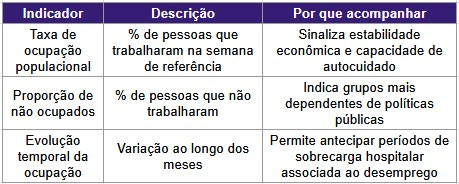



## PERGUNTA 17

In [ ]:
## PERGUNTA 2

In [ ]:
# ===============================
# df_afast_total = pd.read_csv("/content/afastamento_total.csv")

# Carregar dados

sheet_id = "1Vor86OjSCUdTo0vAyIsxGDP2BZVA4oTeitZviQKi9PQ"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

df_afast_total = pd.read_csv(url)

# ===============================
## Preparar dados
df_afast_total.columns = df_afast_total.columns.str.lower()
df_afast_total["pessoas"] = pd.to_numeric(df_afast_total["pessoas"], errors="coerce")

# ===============================
# Função personalizada para esconder porcentagens pequenas
def autopct_hide_small(pct):
    return f"{pct:.1f}%" if pct >= 4 else ""

# ===============================
# Gerar cores com base no número de categorias (Viridis)
colors = cm.viridis(np.linspace(0, 1, len(df_afast_total)))

# ===============================
# Criar gráfico de pizza aprimorado
fig, ax = plt.subplots(figsize=(10, 8))

explode = [0.05] * len(df_afast_total)

wedges, texts, autotexts = ax.pie(
    df_afast_total["pessoas"],
    autopct=autopct_hide_small,
    startangle=90,
    counterclock=False,
    pctdistance=1.3,
    labeldistance=1.1,
    explode=explode,
    radius=1.1,
    colors=colors  # 🔹 aplica a paleta Viridis
)

# Estilo dos textos
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.setp(texts, size=10)

# Legenda fora do gráfico
ax.legend(
    wedges,
    df_afast_total["afastamento"],
    title="Motivos",
    bbox_to_anchor=(1.3, 0.5),
    loc="center left"
)

# Título e espaçamento
plt.title("Motivos de Afastamento Consolidado (Julho–Setembro/2020)",
          fontsize=14, weight="bold", pad=40)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

Esta pergunta considera apenas as pessoas que estavam afastadas do trabalho na semana de referência (variável C002 = 1).
O objetivo é compreender por que elas estavam afastadas — se por questões relacionadas à pandemia, motivos pessoais de saúde ou outros fatores econômicos ou sociais.

Essa análise é essencial para medir o efeito do isolamento e a interrupção das atividades laborais sobre o bem-estar da população.

**`Análise e interpretação`**

O principal motivo de afastamento foi “Quarentena / isolamento / distanciamento / férias coletivas”,
que representa cerca de 73% de todos os afastamentos registrados — uma evidência clara do impacto direto das medidas de contenção da COVID-19 no ambiente de trabalho.

Os afastamentos por motivos de saúde ou acidente (4.528 pessoas) aparecem como segunda maior causa,
mas em proporção muito inferior, sugerindo que a maior parte das interrupções estava relacionada a políticas sanitárias, e não a condições médicas individuais.

As categorias “Férias, folga, jornada variável” e “Afastamento do próprio negócio” reforçam que
parte significativa da força de trabalho autônoma ou informal também foi afetada, sem necessariamente dispor de cobertura previdenciária.

A presença de afastamentos por maternidade, paternidade e fatores ocasionais mostra que,
embora a pandemia tenha sido o principal fator, outros eventos rotineiros continuaram ocorrendo no mercado de trabalho.

**`Relevância para o hospital`**

O grande volume de afastamentos por quarentena e isolamento demonstra como decisões de saúde pública
(como lockdowns e restrições de mobilidade) impactam diretamente o funcionamento das empresas
e, por consequência, a saúde mental e econômica da população.

Esse cenário implica que, em um novo surto, o sistema hospitalar deve se preparar para efeitos colaterais indiretos, como:

*   Aumento de estresse, ansiedade e instabilidade financeira;
*   Maior procura por atendimentos de saúde mental e apoio social;
*   Necessidade de protocolos de afastamento laboral coordenados entre empregadores e autoridades sanitárias.

**`Indicadores-chave sugeridos para o hospital`**


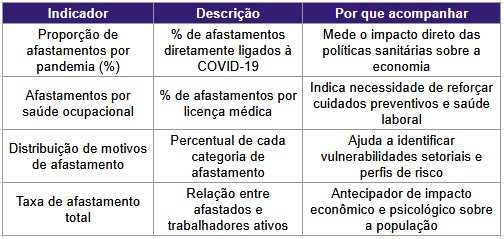

## PERGUNTA 18

In [ ]:
## PERGUNTA 3

In [ ]:
# ===============================
# Consolidado de Home Office
# ===============================
# df_home_total = pd.read_csv("/content/homeoffice_total.csv")

# Carregar dados
sheet_id = "1liL0IBesmVyGrn4sd1SAn0FAbH71ZHjUm2Ns2b91sz0"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

df_home_total = pd.read_csv(url)

# Preparar dados
df_home_total.columns = df_home_total.columns.str.lower()

# Garantir que 'total' é numérico
df_home_total["total"] = pd.to_numeric(df_home_total["total"], errors="coerce")

# Separar versão completa e versão apenas aplicáveis
df_home_valido = df_home_total[df_home_total["situacao"].isin(["Em home office", "Não em home office"])]

# ===============================
# Função para ocultar percentuais <3%
# ===============================
def autopct_filtrado(pct):
    return f"{pct:.1f}%" if pct >= 3 else ""

# ===============================
# 1️⃣ Gráfico completo (com Não aplicável)
# ===============================
colors_full = plt.cm.viridis([i / len(df_home_total) for i in range(len(df_home_total))])

fig, ax = plt.subplots(figsize=(8,7))
wedges, texts, autotexts = ax.pie(
    df_home_total["total"],
    autopct=autopct_filtrado,  # função que oculta <3%
    startangle=90,
    counterclock=False,
    colors=colors_full
)
plt.setp(autotexts, size=10, weight="bold", color="white")

ax.legend(
    wedges,
    df_home_total["situacao"],
    title="Situação",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left"
)

plt.title("Trabalho Remoto Consolidado (Julho - Setembro/2020) - Visão Completa",
          fontsize=14, color="#4A148C", weight="bold")
plt.tight_layout()
plt.show()


# ===============================
# 2️⃣ Gráfico apenas válidos (sem Não aplicável)
# ===============================
colors_validos = plt.cm.viridis([0.35, 0.75])

fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    df_home_valido["total"],
    autopct=autopct_filtrado,
    startangle=90,
    counterclock=False,
    colors=colors_validos
)
plt.setp(autotexts, size=10, weight="bold", color="white")

ax.legend(
    wedges,
    df_home_valido["situacao"],
    title="Situação",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left"
)

plt.title("Trabalho Remoto (Somente Casos Válidos)",
          fontsize=14, color="#4A148C", weight="bold")
plt.tight_layout()
plt.show()

**`O que a pergunta analisa`**

Esta pergunta identifica quantas pessoas estavam trabalhando de forma remota (home office) na semana de referência,
em comparação com aquelas que não estavam e aquelas para as quais a questão não se aplicava (sem ocupação formal).

O objetivo é mensurar o quanto a população pôde se proteger mantendo o distanciamento social
e o quanto dependia de atividades presenciais mais expostas ao contágio da COVID-19.

**`Análise e interpretação`**

A esmagadora maioria (~95%) dos registros está na categoria “Não aplicável”,
o que inclui pessoas sem vínculo de trabalho ativo — reflexo do alto desemprego e da informalidade durante o período crítico da pandemia.

Entre os trabalhadores ativos, apenas 36.921 pessoas estavam em home office,
enquanto 14.819 continuavam exercendo atividades presenciais.
Isso significa que apenas 71% dos trabalhadores ativos conseguiram exercer suas funções remotamente.

Esse dado revela uma desigualdade estrutural de acesso ao trabalho remoto:
profissionais de setores administrativos, educação e tecnologia puderam manter suas atividades em casa,
enquanto trabalhadores da indústria, comércio, transporte e serviços presenciais ficaram mais expostos ao risco de contágio.

O home office, portanto, atuou como uma barreira de proteção sanitária,
mas restrita a uma pequena parcela da população com ocupações mais qualificadas ou digitais.

**`Relevância para o hospital`**

Essa análise mostra que a maioria da população economicamente ativa não tinha condições de isolar-se totalmente,
o que explica maior exposição ao vírus e potenciais surtos localizados em categorias de trabalho presencial.

Em caso de um novo surto, o hospital e as autoridades de saúde devem:

*   Identificar categorias profissionais mais vulneráveis, como transporte, comércio e saúde;

*   Ampliar o monitoramento ocupacional, priorizando testagem e vacinação em grupos presenciais;

*   Fortalecer políticas de saúde mental e ergonomia para quem permanece em home office por longos períodos.

**`Indicadores-chave sugeridos para o hospital`**

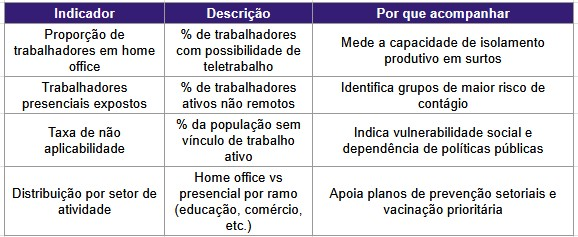

## PERGUNTA 19

In [ ]:
## PERGUNTA 4

In [ ]:
## 1. Comparação da Renda Habitual (Antes da Pandemia) × Efetiva (Depois da Pandemia):**

In [ ]:
import matplotlib.ticker as mticker

# ===============================
# 1️⃣ Comparação Habitual × Efetiva (Consolidado)
# ===============================

# df_renda = pd.read_csv("/content/renda_habitual_vs_efetiva_total.csv")

# Carregar dados
sheet_id = "1aH0nsfGnBl8vuw-SBNwuuZLr5VfJo9-RO-03fVFi39I"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

df_renda = pd.read_csv(url)

# Manter acentuação original
df_renda['faixa_renda'] = df_renda['faixa_renda'].astype(str)

# Remover “Não aplicável” para focar nas faixas de renda reais
df_renda = df_renda[~df_renda['faixa_renda'].str.lower().str.contains("não aplicável")]

# Converter colunas numéricas
df_renda['pessoas_habitual'] = pd.to_numeric(df_renda['pessoas_habitual'], errors='coerce')
df_renda['pessoas_efetiva'] = pd.to_numeric(df_renda['pessoas_efetiva'], errors='coerce')

# Ordenar faixas de renda de forma lógica
ordem = [
    "0 - 100", "101 - 300", "301 - 600", "601 - 800", "801 - 1.600",
    "1.601 - 3.000", "3.001 - 10.000", "10.001 - 50.000",
    "50.001 - 100.000", "Mais de 100.000"
]
df_renda['faixa_renda'] = pd.Categorical(df_renda['faixa_renda'], categories=ordem, ordered=True)
df_renda = df_renda.sort_values('faixa_renda')

# Paleta Viridis
colors = plt.cm.viridis([0.25, 0.75])

# Função para formatar o eixo Y com "mil"
def formatar_milhar(x, pos):
    if x >= 1000:
        return f"{x/1000:.0f} mil"
    else:
        return int(x)

# Criar gráfico de barras agrupadas
ax = df_renda.plot(
    x="faixa_renda",
    y=["pessoas_habitual", "pessoas_efetiva"],
    kind="bar",
    figsize=(12,6),
    color=colors
)

# Aplicar formatação ao eixo Y
ax.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_milhar))

# Título e eixos
plt.title("Comparação da Renda Habitual × Efetiva - Consolidado (Julho a Setembro/2020)", fontsize=14, color="#4A148C", weight='bold')
plt.xlabel("Faixa de Renda (R$)")
plt.ylabel("Número de Pessoas")
plt.legend(["Renda Habitual", "Renda Efetiva"], title="Tipo de Renda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## EXPLICAÇÃO

Este gráfico compara a renda habitual (quanto as pessoas normalmente recebiam antes do impacto da pandemia) com a renda efetiva (quanto realmente receberam entre julho e setembro de 2020).

**`Interpretação no contexto da COVID-19:`**

*   Efeito de queda de renda:

A pandemia causou uma redução drástica nas rendas médias, especialmente entre trabalhadores informais e pequenos empreendedores.

*   Redistribuição para faixas mais baixas:

O aumento de pessoas nas faixas “até R$ 600” mostra empobrecimento populacional — consequência direta de isolamento, fechamento de comércios e suspensão de contratos.

*   Desigualdade ampliada:

As faixas mais altas se mantiveram praticamente estáveis, mostrando proteção econômica maior entre quem já tinha mais recursos.


**`Implicações para o Hospital:`**

Essa queda na renda média e migração para faixas baixas tem impacto direto na demanda hospitalar:

*   Aumento de pacientes dependentes do SUS e de programas públicos.
*   Atraso em tratamentos e menor adesão a medicamentos por falta de recursos.
*   Maior necessidade de planejamento orçamentário hospitalar para atender populações vulneráveis em novos surtos.

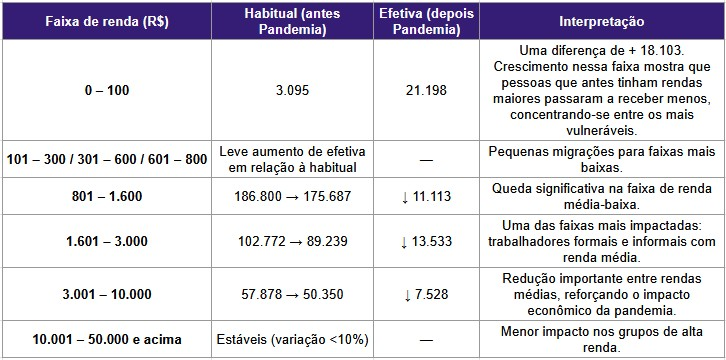

In [ ]:
## 2. Impacto Geral na Renda (Perdeu, Manteve, Ganhou):

In [ ]:
# ===============================
# 2️⃣ Impacto Geral na Renda (Consolidado)
# ===============================
# df_impacto = pd.read_csv("/content/impacto_renda_total.csv")

# Carregar dados
sheet_id = "1_Xaot9pufSpHW3j5pjJFtTHT5swstCxRsGm__XT_OGo"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

df_impacto = pd.read_csv(url)

# Manter acentuação original
df_impacto['impacto_renda'] = df_impacto['impacto_renda'].astype(str)

# Converter para numérico
df_impacto['pessoas'] = pd.to_numeric(df_impacto['pessoas'], errors='coerce')

# Ordenar categorias para leitura lógica
ordem_impacto = ["Perdeu renda", "Manteve renda", "Ganhou renda", "Não aplicável"]
df_impacto['impacto_renda'] = pd.Categorical(df_impacto['impacto_renda'], categories=ordem_impacto, ordered=True)
df_impacto = df_impacto.sort_values('impacto_renda')

# Aplicar paleta Viridis proporcional ao número de categorias
colors = plt.cm.viridis([0.15, 0.4, 0.65, 0.9])

# Criar gráfico de pizza
fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    df_impacto["pessoas"],
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    colors=colors
)
plt.setp(autotexts, size=10, weight="bold", color="white")

# Legenda fora do gráfico
ax.legend(
    wedges,
    df_impacto["impacto_renda"],
    title="Impacto na Renda",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left"
)

# Título estilizado
plt.title("Impacto Geral na Renda - Julho a Setembro/2020", fontsize=14, color="#4A148C", weight="bold")
plt.tight_layout()
plt.show()

In [ ]:
## EXPLICAÇÃO

A pizza é dominada pela fatia “Não aplicável”, seguida por “Manteve renda” e uma porção menor “Perdeu renda”.
Isso evidencia que a maioria da população estava fora do mercado de trabalho ou sem renda formal, e que os efeitos econômicos da pandemia foram concentrados nas camadas produtivas.

**`Interpretação no contexto da COVID-19:`**

*   *Queda de renda e vulnerabilidade:*

Apenas 0,46% das pessoas ganharam renda. A grande maioria manteve ou perdeu, o que significa redução do poder aquisitivo e dificuldade de acesso a bens essenciais.
*   *População fora do mercado:*

O alto número de “não aplicável” indica desemprego estrutural e dependência do sistema público de saúde e assistência.

*   *Desigualdade de recuperação:*

Mesmo após o pico da pandemia, apenas uma minoria conseguiu recuperar ou ampliar a renda.

**`Implicações para o Hospital:`**

Esses dados ajudam o hospital a entender quem será mais afetado em novos surtos:


*   Planejamento preventivo:

Populações de baixa renda são mais suscetíveis a interromper tratamentos, evitar consultas e postergar exames.
→ O hospital precisa planejar protocolos de triagem rápida, teleatendimento gratuito e estoque extra de medicamentos.

*   Integração com políticas públicas:

Cooperação com prefeituras e programas de assistência é essencial para mitigar impactos de crises sanitárias futuras.

Esses dados ajudam o hospital a entender quem será mais afetado em novos surtos:

*Planejamento preventivo:*
Populações de baixa renda são mais suscetíveis a interromper tratamentos, evitar consultas e postergar exames.
→ O hospital precisa planejar protocolos de triagem rápida, teleatendimento gratuito e estoque extra de medicamentos.

*Integração com políticas públicas:*
Cooperação com prefeituras e programas de assistência é essencial para mitigar impactos de crises sanitárias futuras.

## PERGUNTA 20


In [ ]:
## PERGUNTA 5

In [ ]:
## Procurou trabalho? (Consolidado)

In [ ]:
# ===============================
# 1️⃣ Procurou Trabalho?
# ===============================
# df_procura = pd.read_csv("/content/procura_trabalho_total.csv")

# Carregar dados
sheet_id = "15drhdCkzpFGBUJ964_-mjLOhkMq2pVmpffVpfSArH20"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

df_procura = pd.read_csv(url)

# Normalizar nomes das colunas
df_procura.columns = df_procura.columns.str.strip().str.lower()

# Manter acentuação original do CSV
df_procura['procurou_trabalho'] = df_procura['procurou_trabalho'].astype(str)

# Converter para número
df_procura['pessoas'] = pd.to_numeric(df_procura['pessoas'], errors='coerce')

# Paleta Viridis
colors1 = plt.cm.viridis([0.25, 0.55, 0.85])

# Criar gráfico de pizza
fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    df_procura['pessoas'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=colors1
)

# Estilo dos percentuais
plt.setp(autotexts, size=10, weight='bold', color="white")

# Legenda lateral
ax.legend(
    wedges,
    df_procura['procurou_trabalho'],
    title="Situação",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left"
)

# Título e layout
plt.title("Procurou Trabalho - Julho a Setembro/2020", fontsize=14, color="#4A148C", weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
## Motivo de Não Procurar Trabalho

In [ ]:
# ===============================
# 2️⃣ Motivo de Não Procurar Trabalho
# ===============================
# df_motivo = pd.read_csv("/content/motivo_nao_procurou_total.csv")

# Carregar dados
sheet_id = "1xO98BC7On8RuEO-j52VlkqN5QZ63lkzEmUO3ju9DGsM"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

df_motivo = pd.read_csv(url)

# Limpeza
df_motivo.columns = df_motivo.columns.str.strip().str.lower()

# Manter texto original (sem remover acentos)
df_motivo['motivo_nao_procurou'] = df_motivo['motivo_nao_procurou'].astype(str)

# Converter coluna de pessoas para numérica
df_motivo['pessoas'] = pd.to_numeric(df_motivo['pessoas'], errors='coerce')

# Ordenar por número de pessoas
df_motivo = df_motivo.sort_values('pessoas', ascending=True)

# Paleta Viridis escalonada
colors2 = plt.cm.viridis([i / len(df_motivo) for i in range(len(df_motivo))])

# Função para formatar valores no eixo (ex.: 20000 → "20 mil")
def formatar_milhar(x, pos):
    if x >= 1000:
        return f"{x/1000:.0f} mil"
    else:
        return int(x)

# Criar gráfico de barras horizontais
plt.figure(figsize=(10,6))
plt.barh(df_motivo['motivo_nao_procurou'], df_motivo['pessoas'], color=colors2)
plt.title("Motivos de Não Procurar Trabalho (Consolidado)", fontsize=14, color="#4A148C", weight='bold')
plt.xlabel("Número de Pessoas")
plt.ylabel("Motivo")

# Aplicar formatação no eixo X
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(formatar_milhar))

# Ajustes visuais
plt.tight_layout()
plt.show()

In [ ]:
## Gostaria de Ter Trabalhado?

In [ ]:
# ===============================
# 3️⃣ Gostaria de Ter Trabalhado?
# ===============================
# df_gostaria = pd.read_csv("/content/gostaria_trabalhar_total.csv")

# Carregar dados
sheet_id = "123JhuQ5GEPVutsWPMrdFbP-xfefU47B2iHEAL5vwMbI"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

df_gostaria = pd.read_csv(url)

# Limpeza
df_gostaria.columns = df_gostaria.columns.str.strip().str.lower()

# Manter acentuação original (sem normalização)
df_gostaria['gostaria_trabalhar'] = df_gostaria['gostaria_trabalhar'].astype(str)

# Converter coluna de pessoas para numérica
df_gostaria['pessoas'] = pd.to_numeric(df_gostaria['pessoas'], errors='coerce')

# Paleta Viridis
colors3 = plt.cm.viridis([0.3, 0.6, 0.9])

# Criar gráfico de pizza
fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    df_gostaria['pessoas'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=colors3
)

# Ajustar estilo dos percentuais
plt.setp(autotexts, size=10, weight='bold', color="white")

# Adicionar legenda ao lado
ax.legend(
    wedges,
    df_gostaria['gostaria_trabalhar'],
    title="Interesse em Trabalhar",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left"
)

# Título e layout
plt.title("Gostaria de Ter Trabalhado? (Julho a Setembro/2020)", fontsize=14, color="#4A148C", weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
## Explicação

Apenas 5% da população pesquisada tentou buscar emprego no período.
Isso revela um quadro de paralisia econômica — o isolamento social, a incerteza e a queda de renda reduziram drasticamente o movimento no mercado de trabalho.

O principal motivo não foi falta de vontade, mas sim condições externas — a pandemia, a ausência de vagas e o isolamento social.
Mais de 94 mil pessoas declararam explicitamente que não procuraram trabalho por causa da COVID-19.

Cerca de 13% da população queria trabalhar, mas não buscou emprego.
Isso mostra um desalento econômico: as pessoas desistiram de procurar por acreditarem que não conseguiriam emprego — fenômeno típico de crises prolongadas.

**`Implicações para o Hospital`**

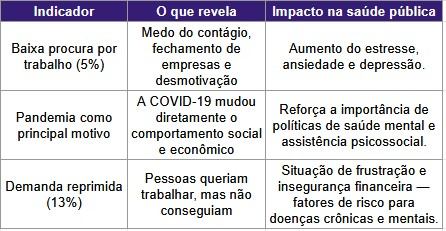



A análise revela que, durante a pandemia, a força de trabalho brasileira ficou paralisada:
Poucos procuraram emprego, e muitos desistiram — não por falta de vontade, mas por medo, isolamento e falta de oportunidades.
Esse desalento coletivo agravou a vulnerabilidade social e emocional, refletindo-se em aumento da pressão sobre o sistema público de saúde, tanto física quanto mentalmente.

In [ ]:
## CONCLUSÃO

A análise da renda evidencia que a COVID-19 não foi apenas uma crise de saúde, mas também uma crise econômica.
A redução da renda média e o aumento da informalidade criaram um cenário de maior demanda hospitalar pública, principalmente entre grupos que perderam poder aquisitivo.
Em caso de novo surto, a prevenção e o acesso facilitado ao sistema de saúde serão fundamentais para evitar colapsos.